In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kurtosis

import datetime as dt

from IPython.display import clear_output

import warnings

import gc
import sys
sys.path.append( 'info_metrics/')

from entropy_metrics import *

In [2]:
def column_merger(columns):
    columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in columns]
    return columns

def count_unique(series):
    return len(np.unique(series))

def mean_absolute_deviation(x):
    return np.mean(np.abs(x - np.mean(x)))


def m1(df, year, month=None, day=None, hour=None, domain=None, traffic=None):
    
    if year != None and month != None and day != None and domain != None and traffic != None :
        return ((df["year"] == year) & (df["month"] == month) & (df["day"] == day) & (df["domain"] == domain) & (df["trafficType"] == traffic))
    
    elif year != None and month != None and day != None and traffic != None :
        return ((df["year"] == year) & (df["month"] == month) & (df["day"] == day) & (df["trafficType"] == traffic))
    
    elif year != None and month != None and day != None and domain != None :
        return ((df["year"] == year) & (df["month"] == month) & (df["day"] == day) & (df["domain"] == domain))
    
    elif year != None and month != None and day != None:
        return ((df["year"] == year) & (df["month"] == month) & (df["day"] == day))
    
    elif year != None and month != None:
        return (df["year"] == year) & (df["month"] == month)

    elif year != None:
        return (df["year"] == year)

    else:
        raise ValueError


def prepare_df(df):
    
    simple_stats = {
    "CumCount": [np.sum] }

    df = df.groupby(by=["title", "domain", "trafficType", "timestamp"]).agg(simple_stats).reset_index()
    df.columns = column_merger(df.columns)
    df = df.rename(columns={'CumCount_sum': 'CumCount'})
    df["Date"] = pd.to_datetime(df["timestamp"], unit="s")
    df["year"] = df["Date"].dt.year
    df["month"] = df["Date"].dt.month
    df["day"] = df["Date"].dt.day
    df["hour"] = df["Date"].dt.hour
    df.drop("timestamp", inplace=True, axis=1)
    df = df.sort_values(by=["hour", "domain", "trafficType", "title"], ascending=True)
    return df


In [3]:
df1 = pd.read_parquet("../../data/big/A6_04-05.parquet")
print("df1 loaded")
df2 = pd.read_parquet("../../data/big/A6_07-08.parquet")
print("df2 loaded")
df1 = prepare_df(df1)
print("df1 prepared")
df2 = prepare_df(df2)
print("df2 prepared")

In [4]:
unique_traffictype_df1 = np.array(df1["trafficType"].unique())
unique_traffictype_df2 = np.array(df2["trafficType"].unique())
unique_domains_df1 = np.array(df1["domain"].unique())
unique_domains_df2 = np.array(df2["domain"].unique())
hours = pd.date_range(start=dt.datetime(2019,9,4,1), end=dt.datetime(2019,9,4,23), freq="H")


KeyboardInterrupt: 

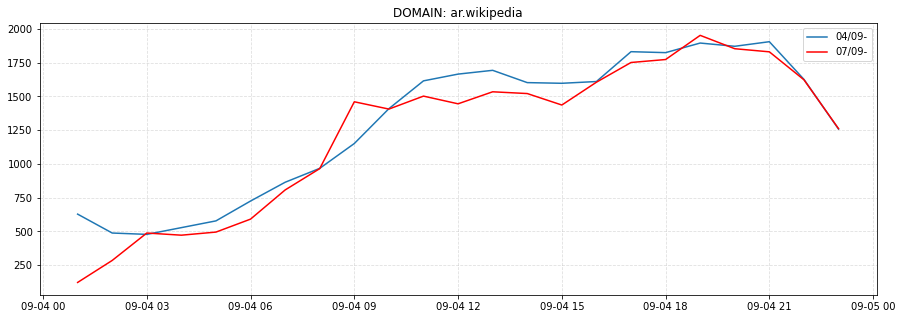

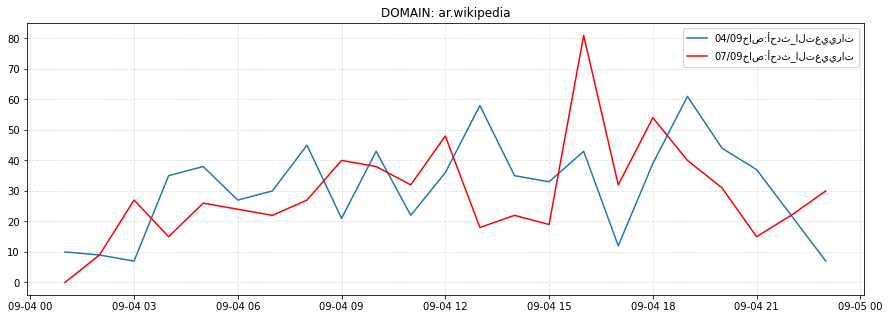

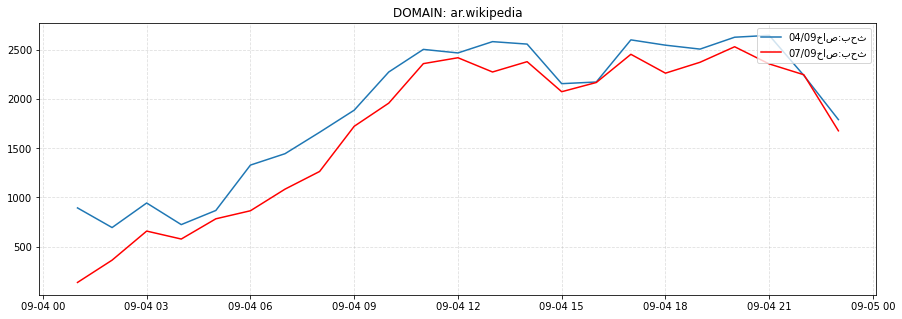

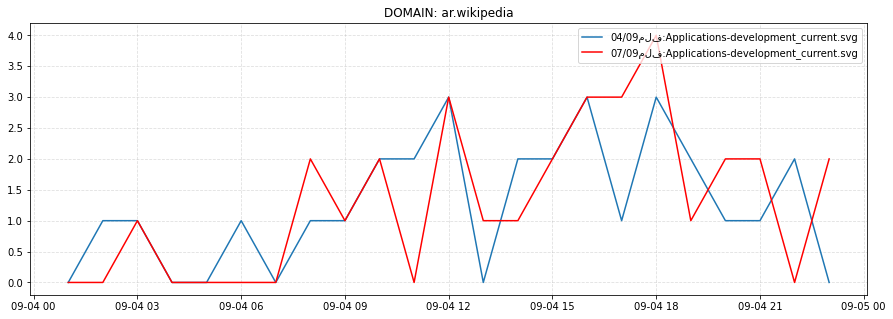

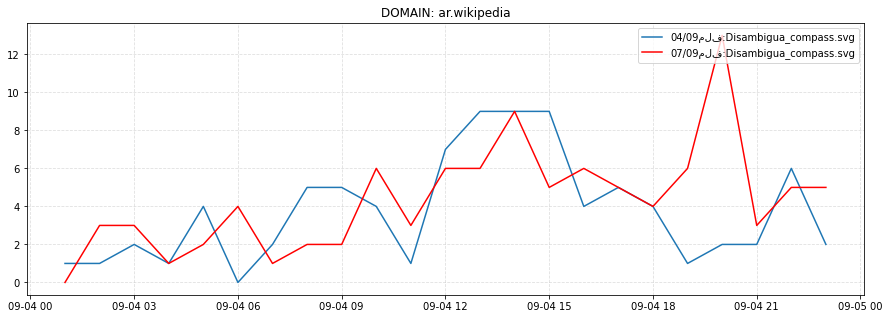

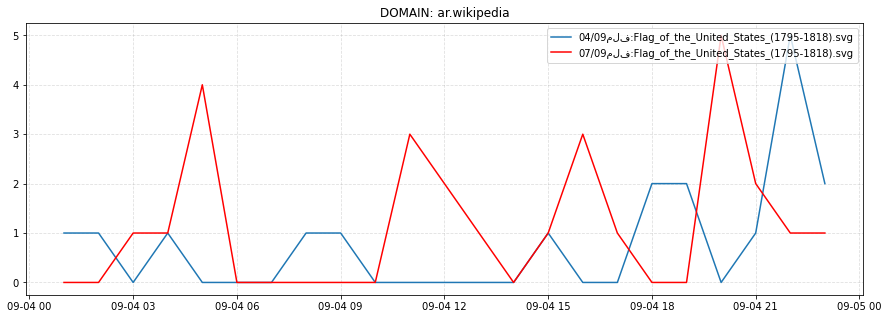

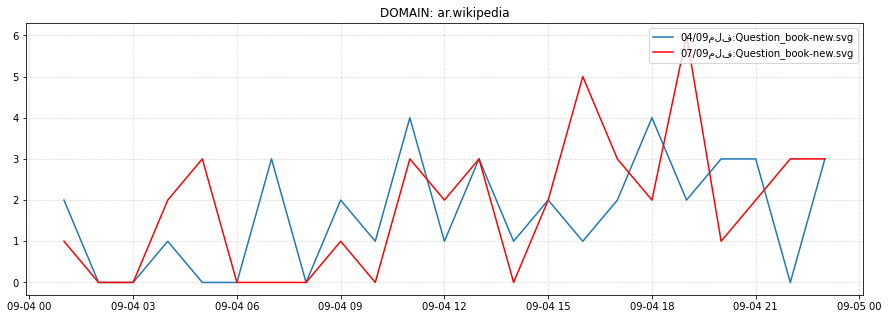

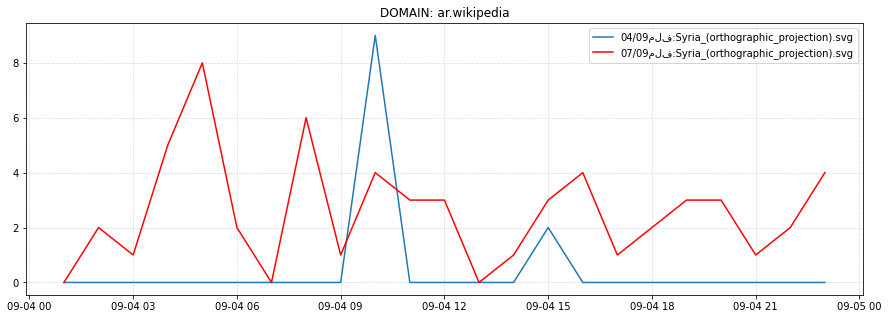

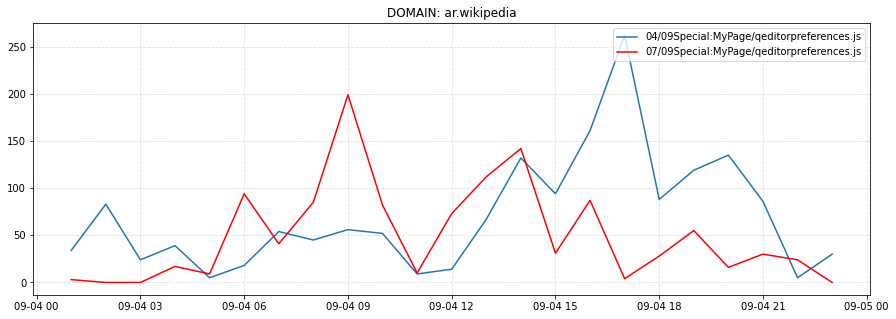

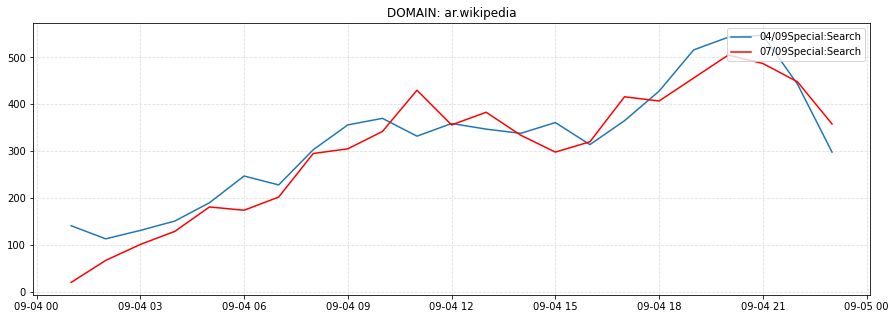

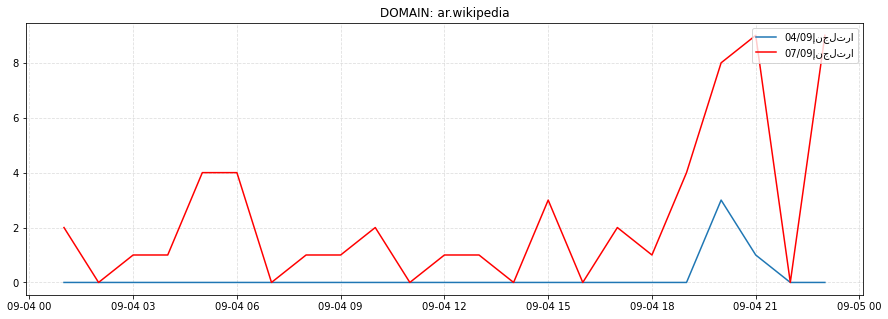

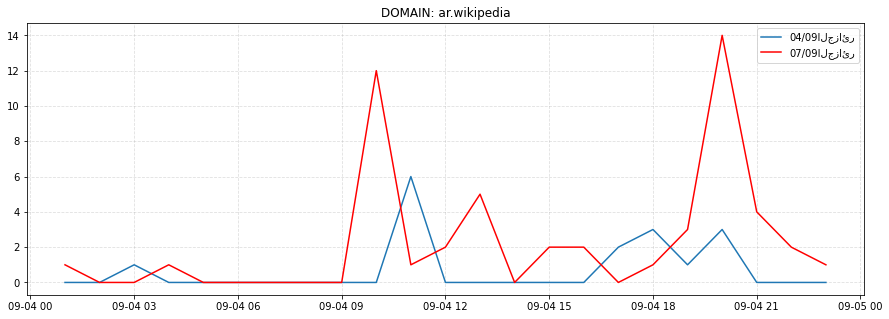

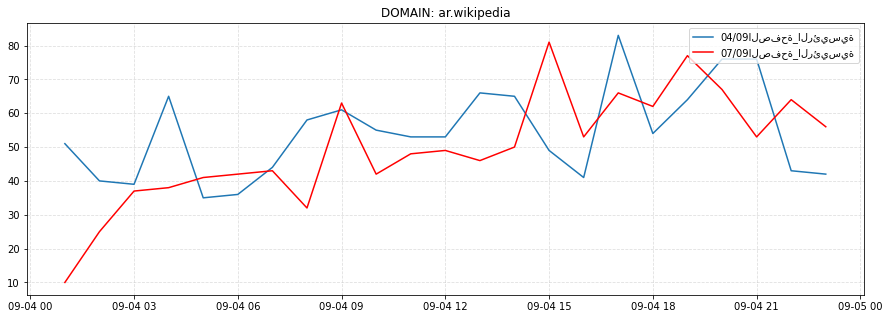

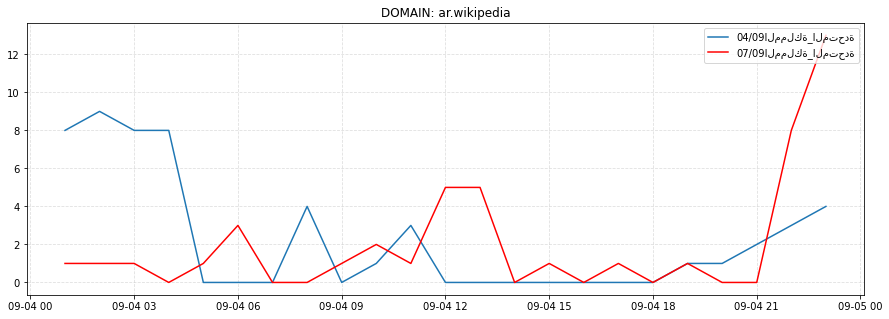

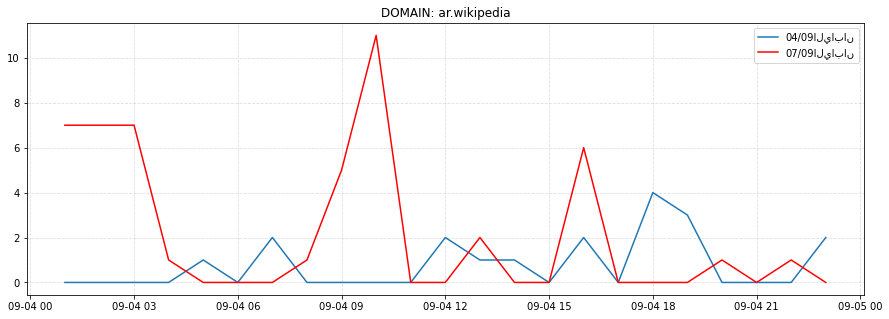

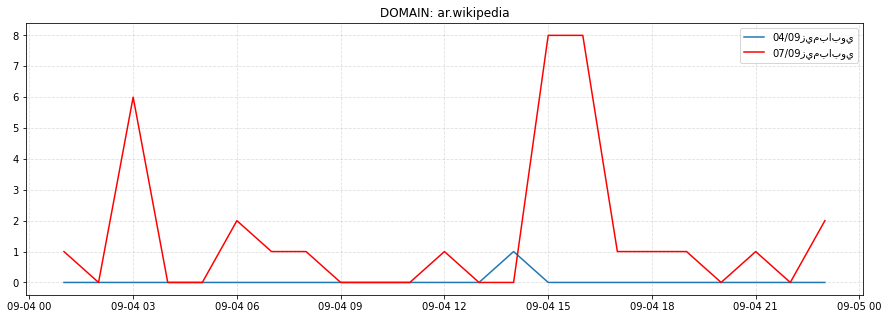

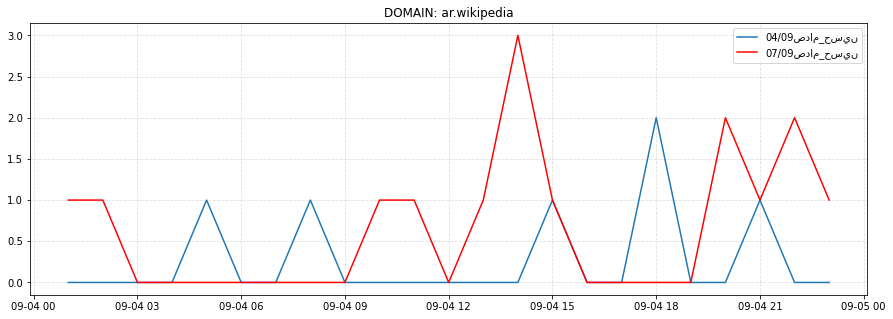

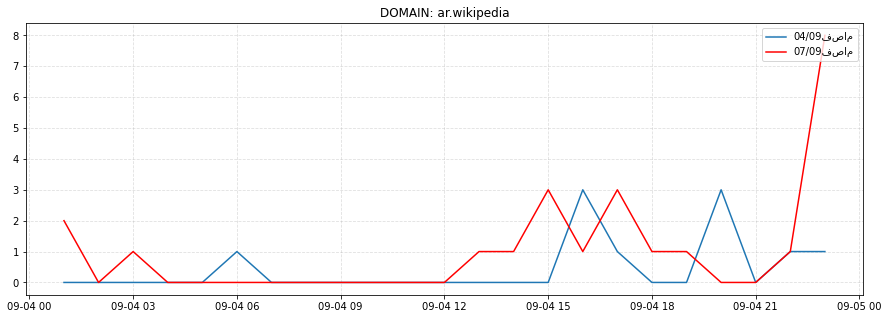

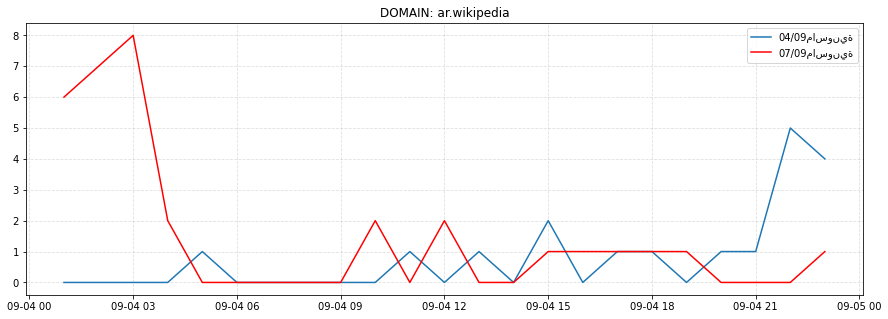

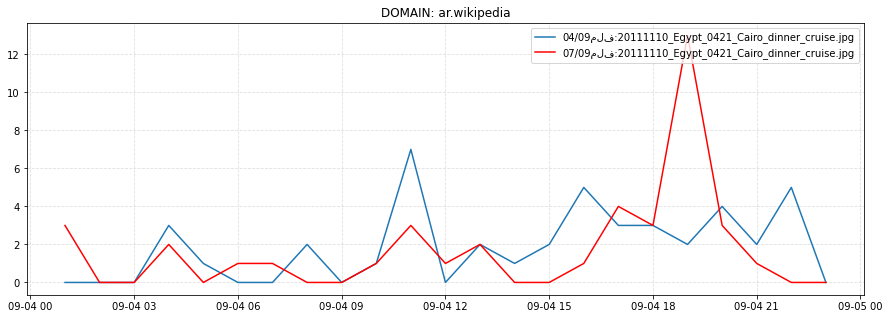

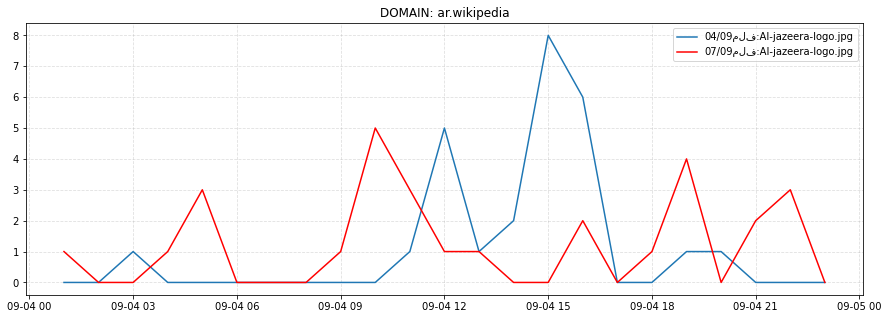

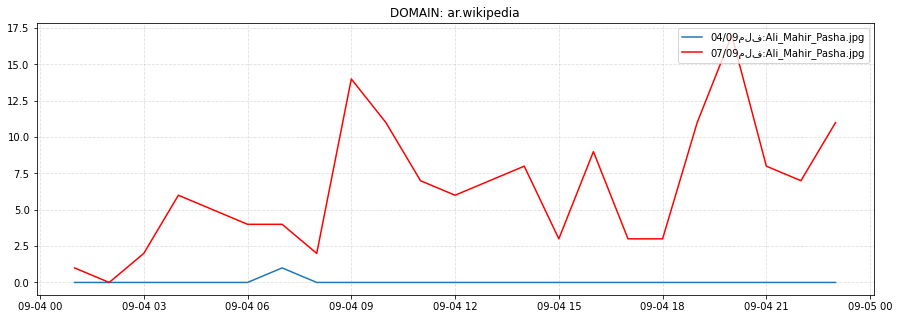

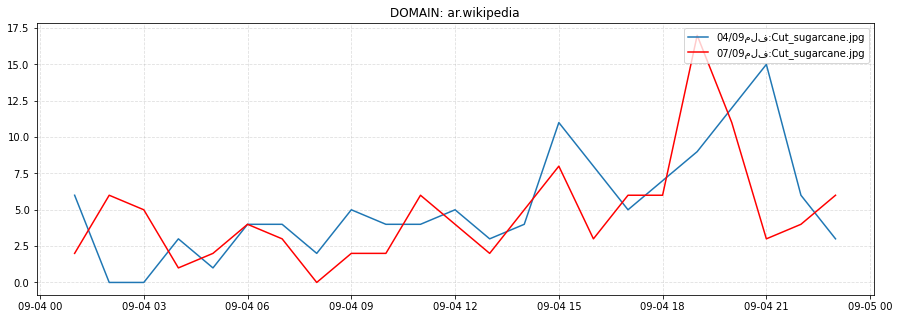

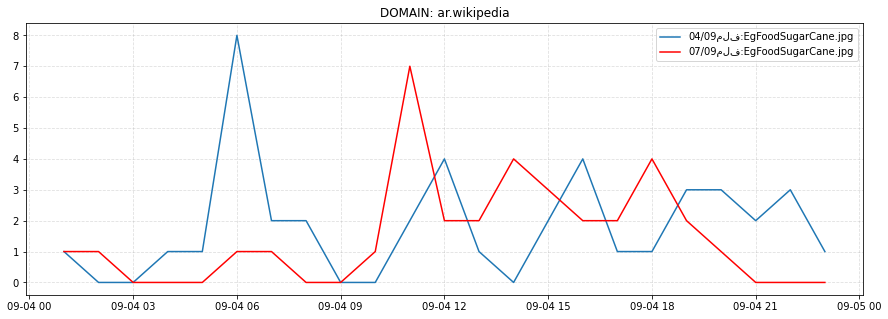

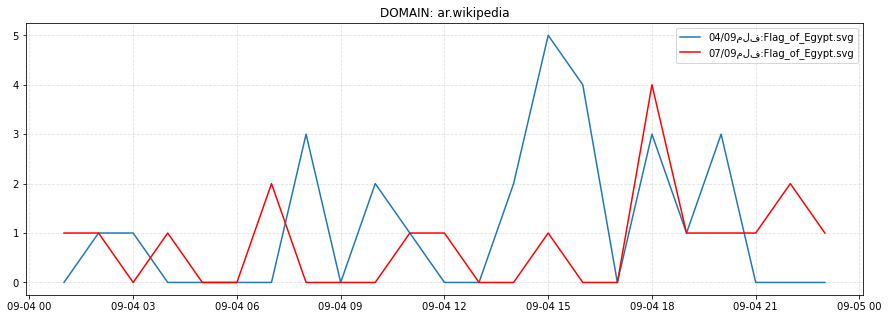

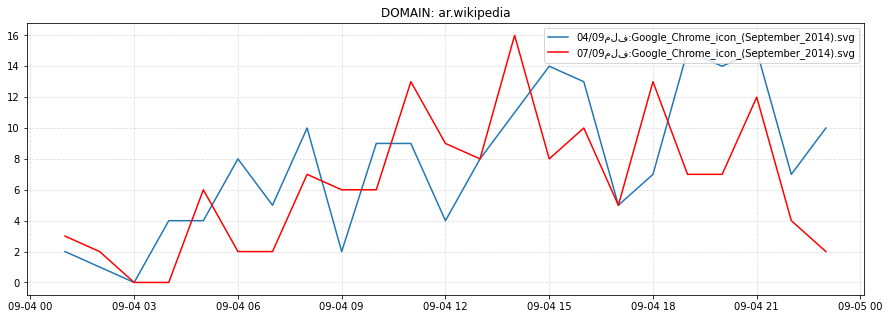

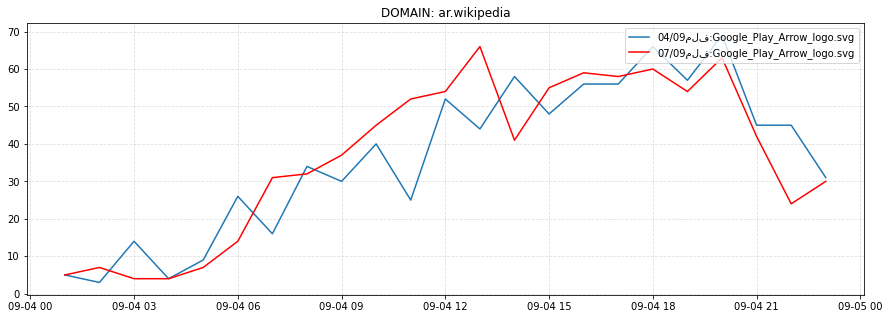

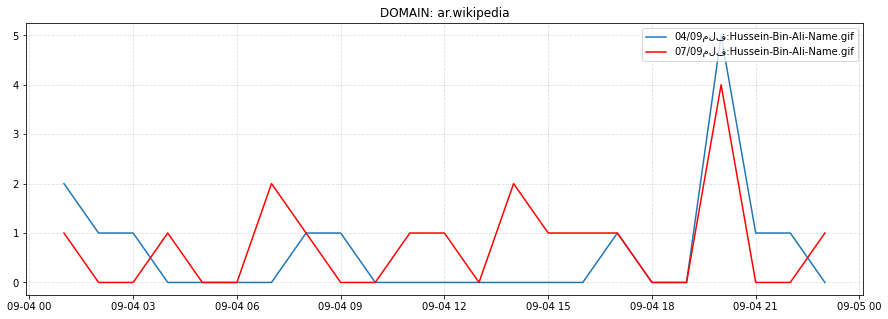

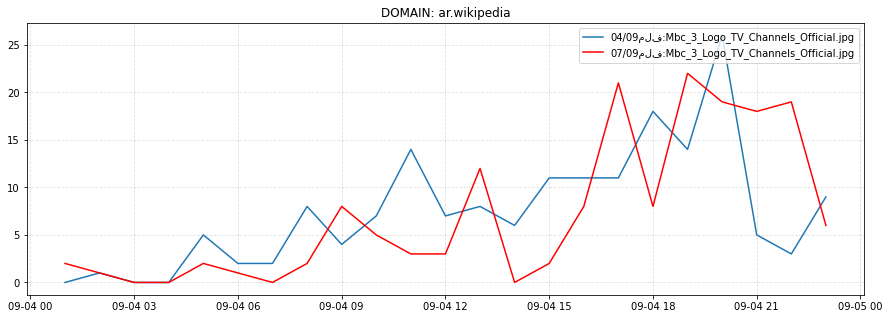

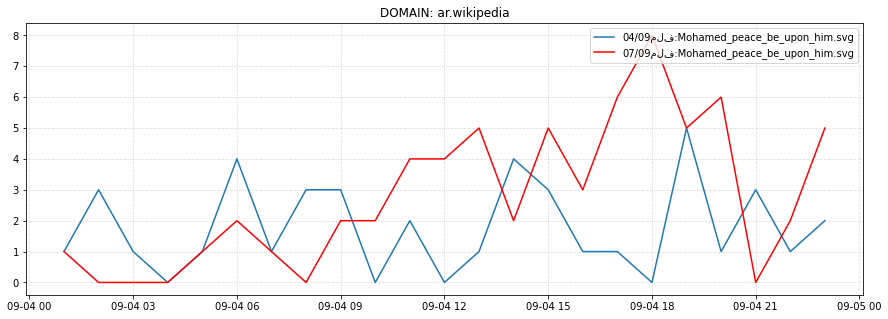

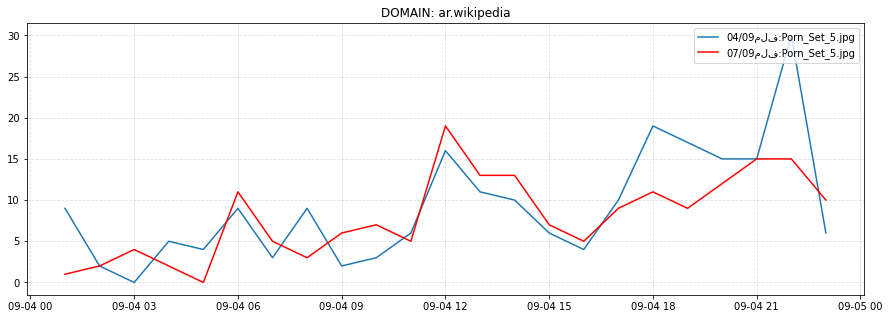

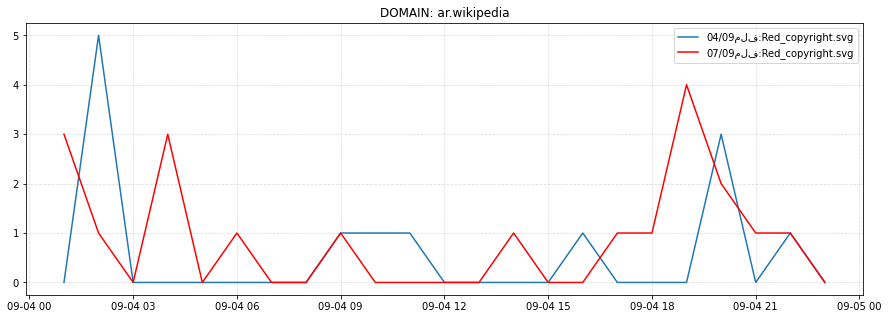

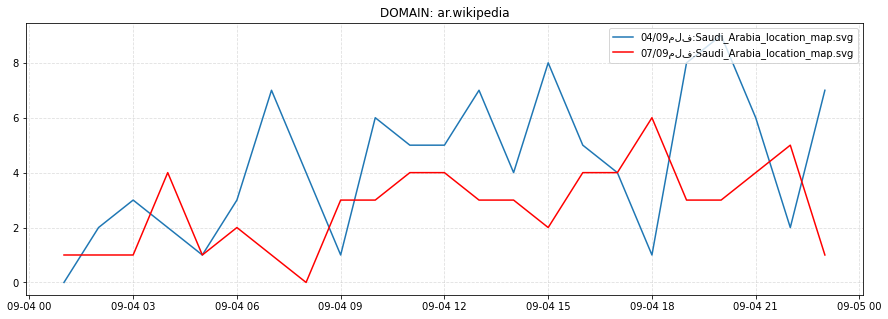

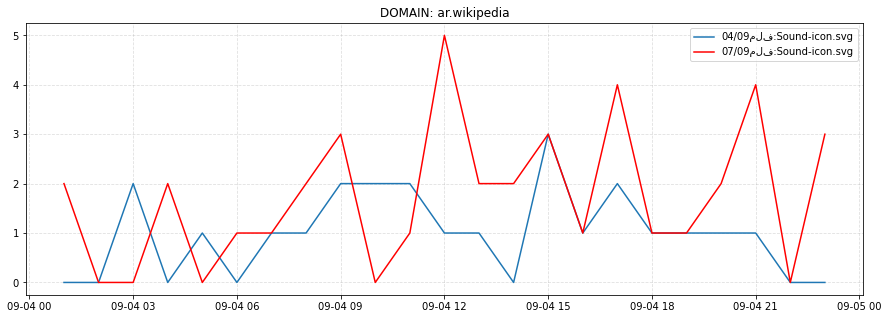

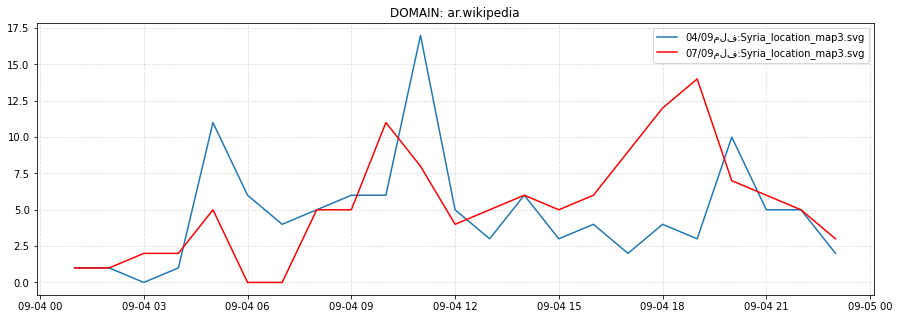

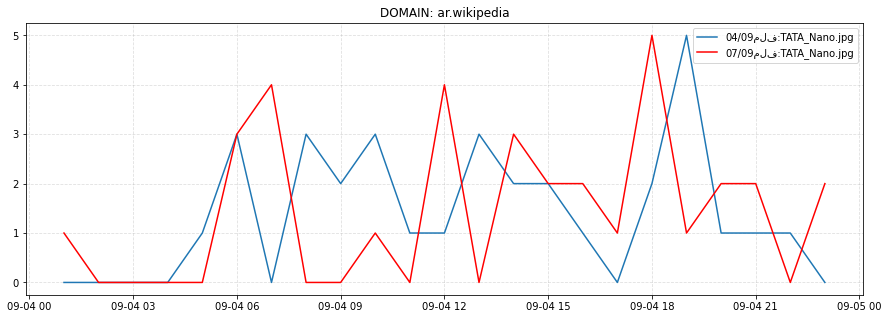

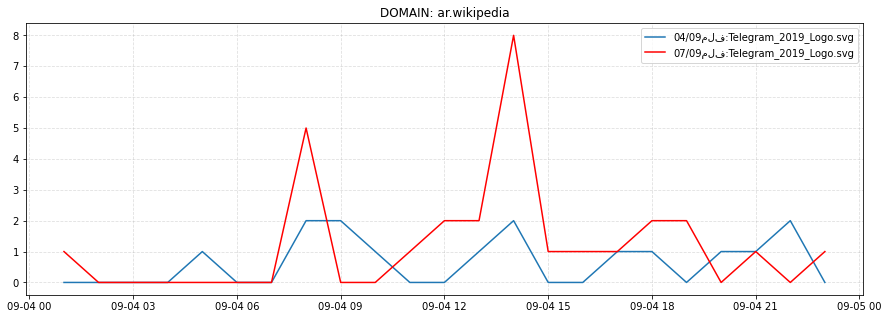

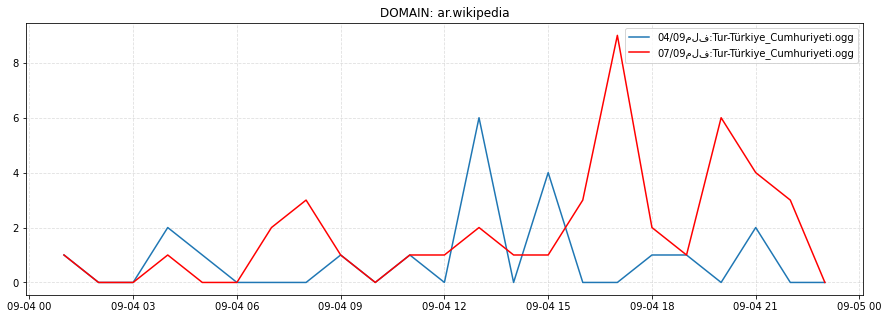

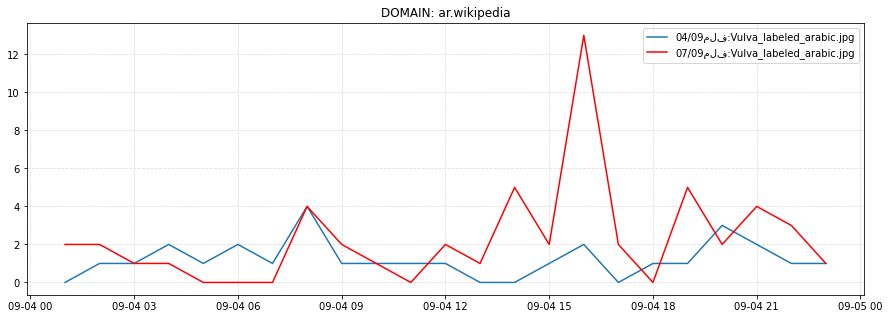

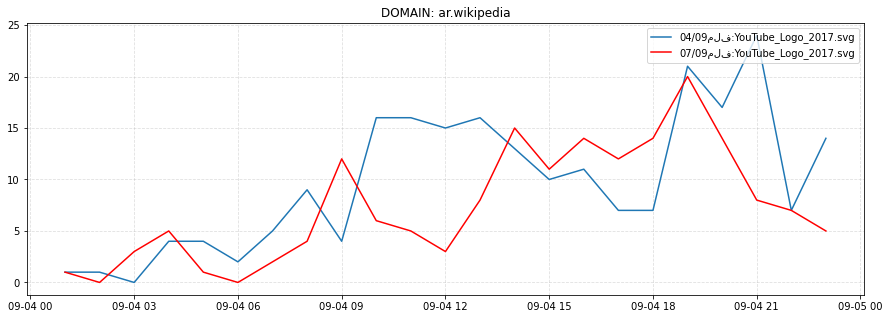

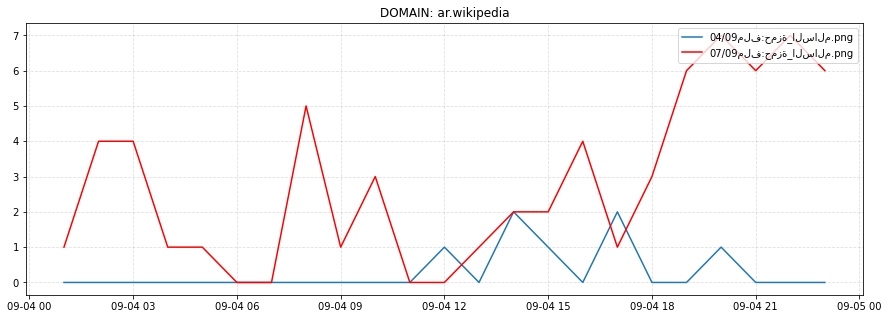

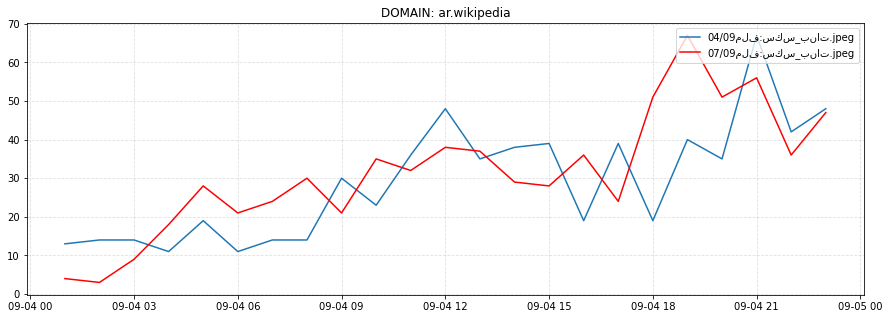

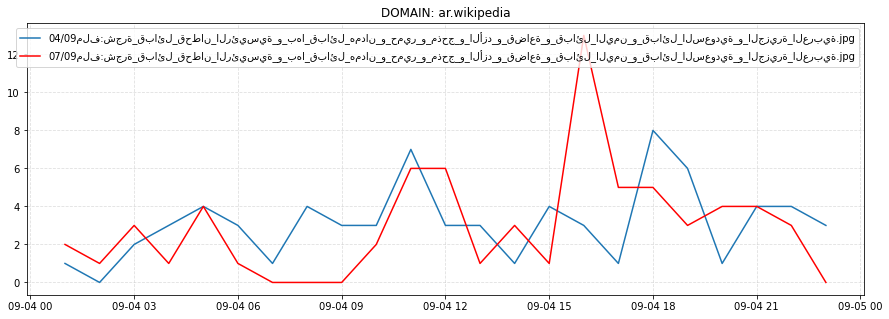

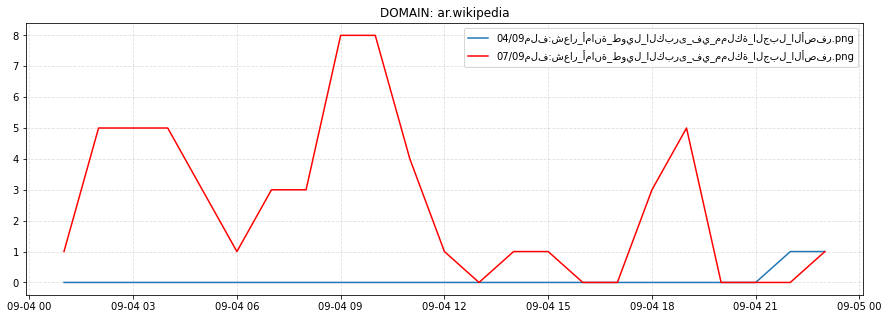

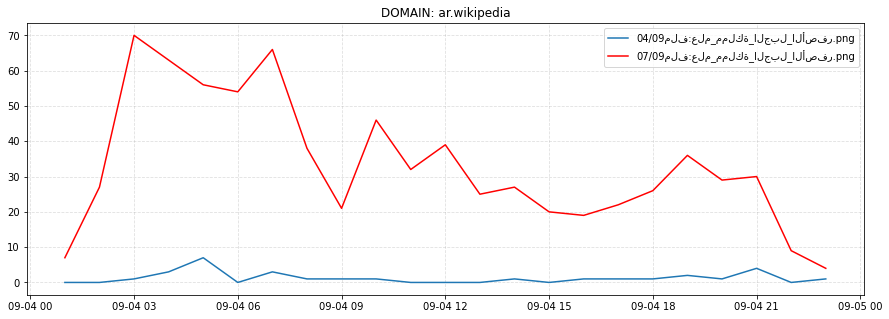

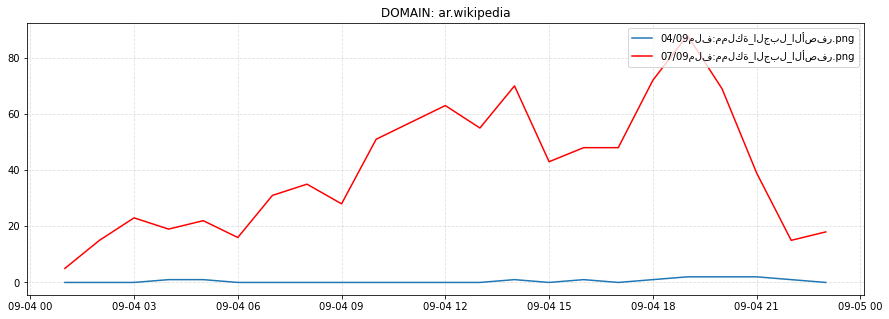

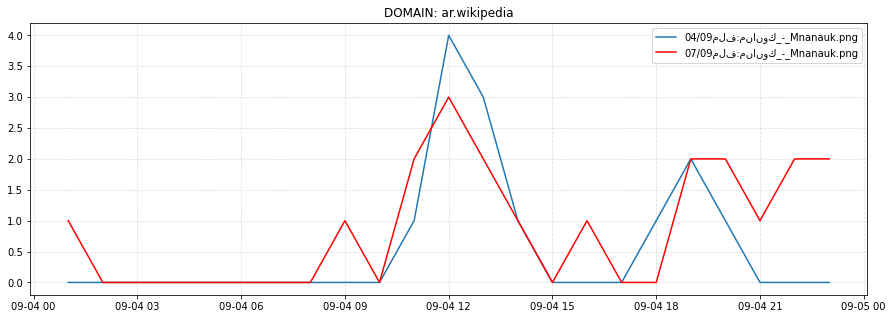

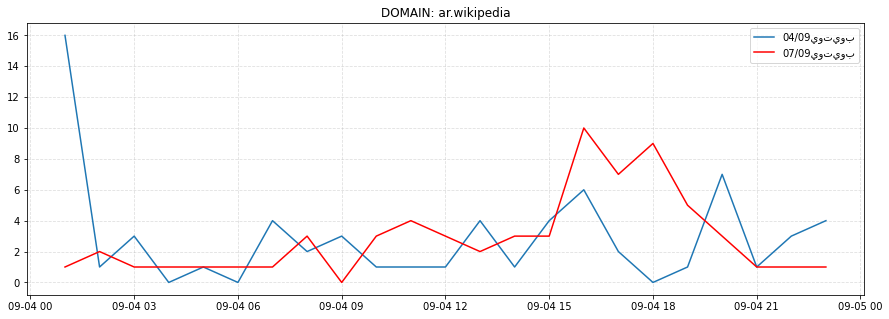

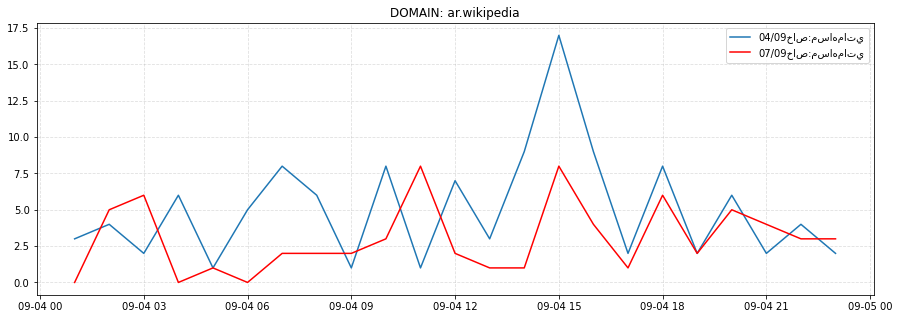

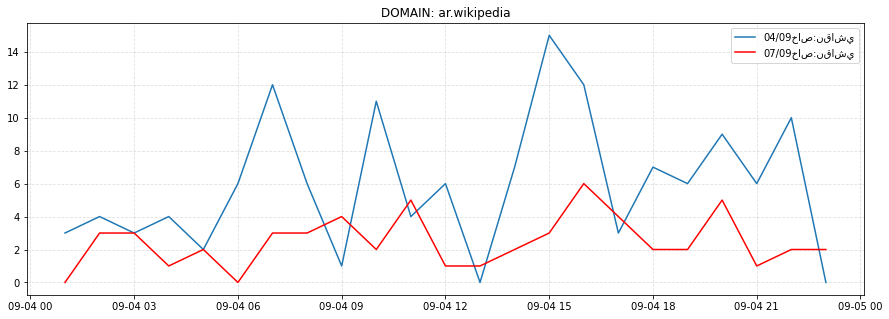

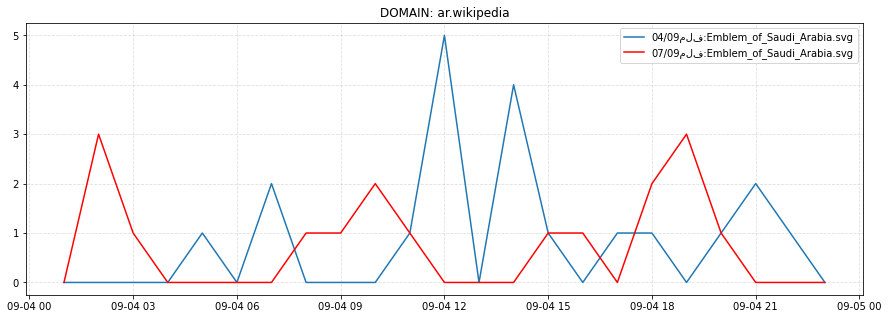

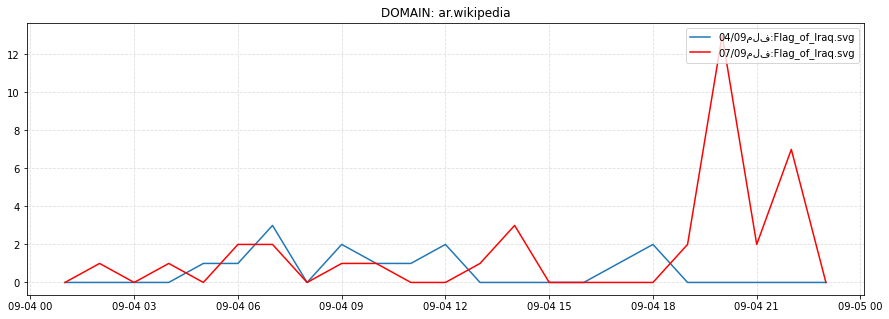

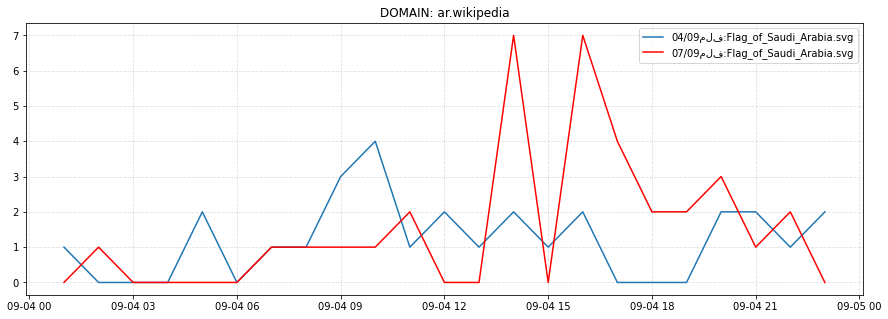

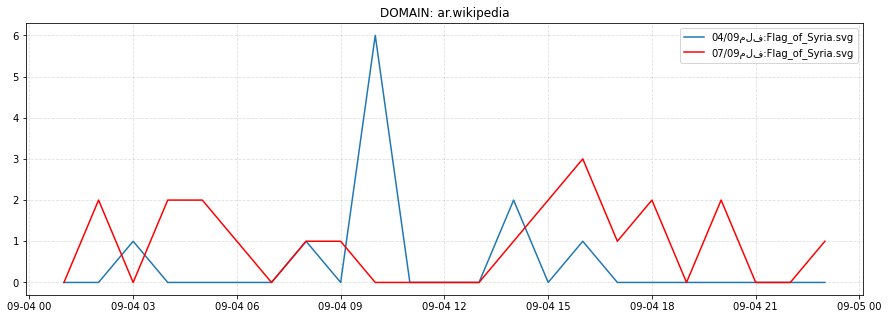

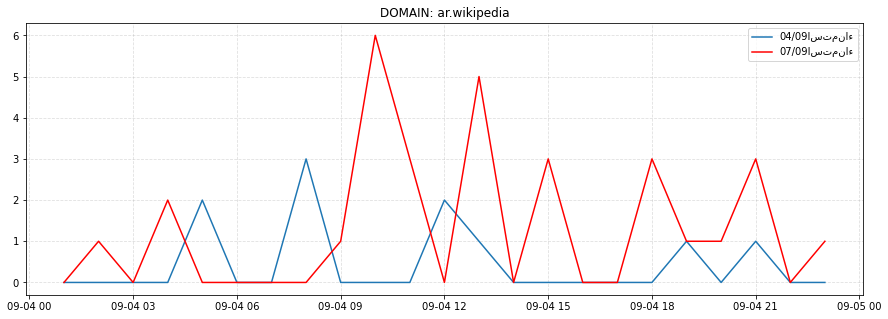

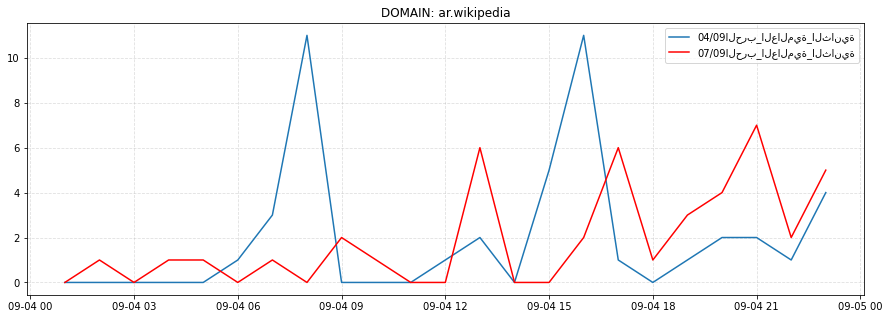

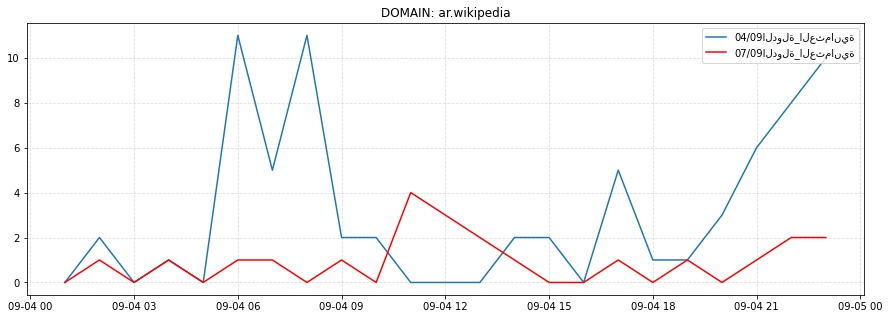

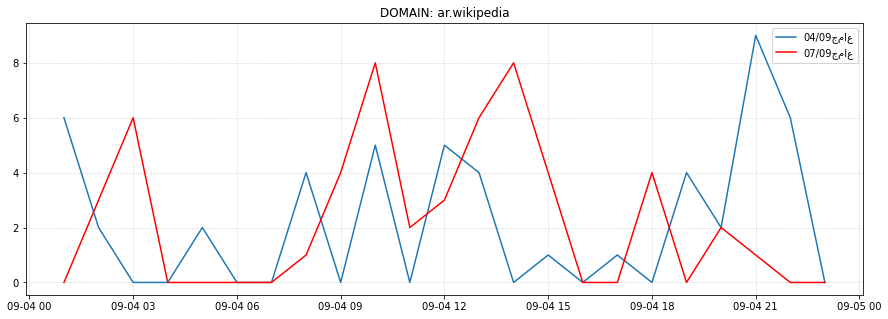

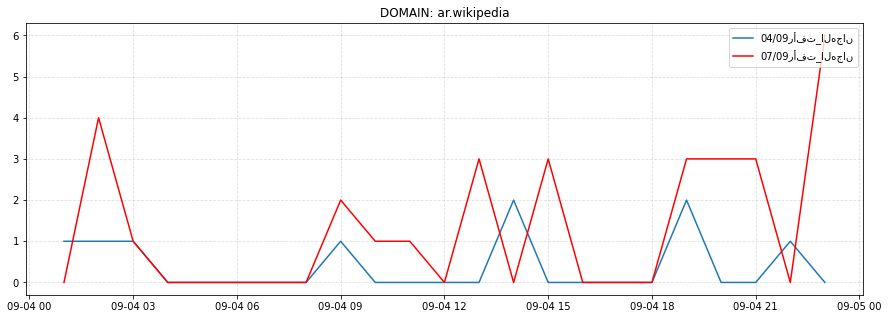

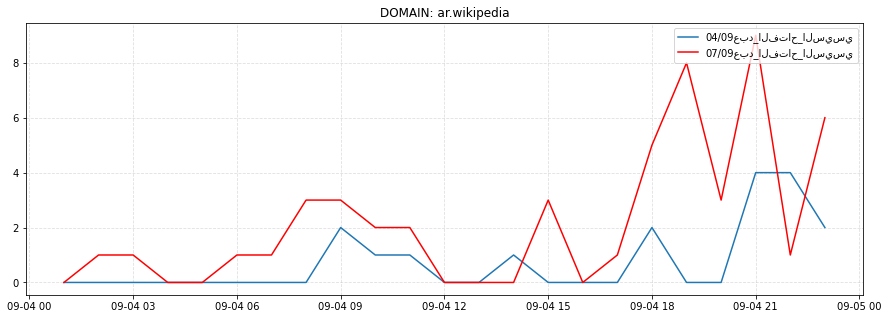

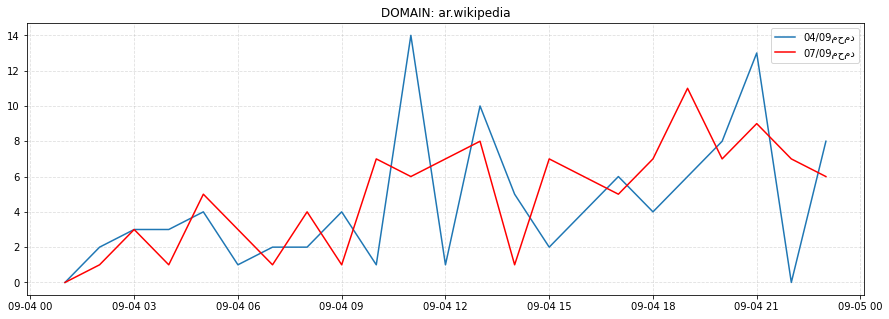

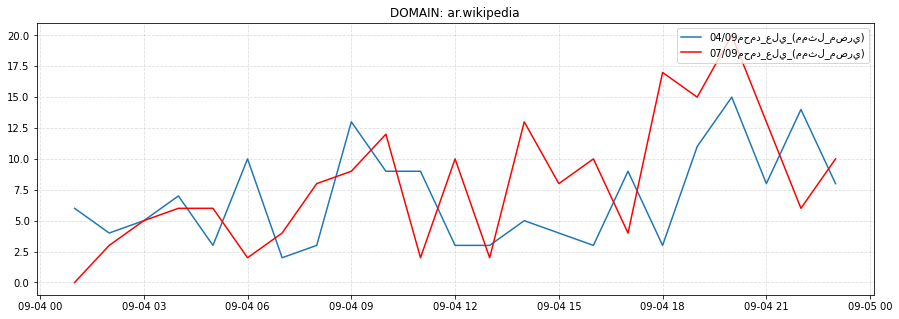

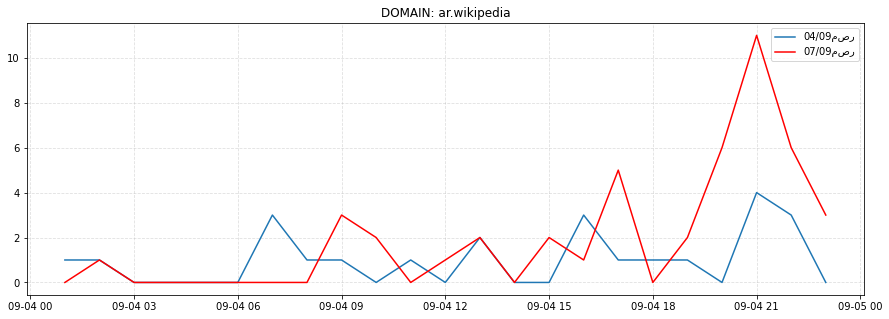

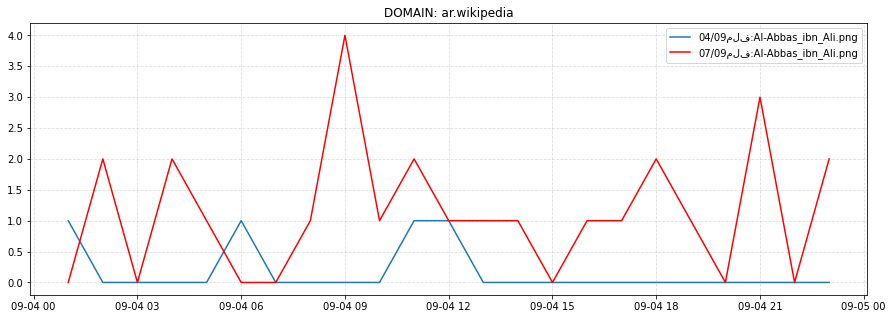

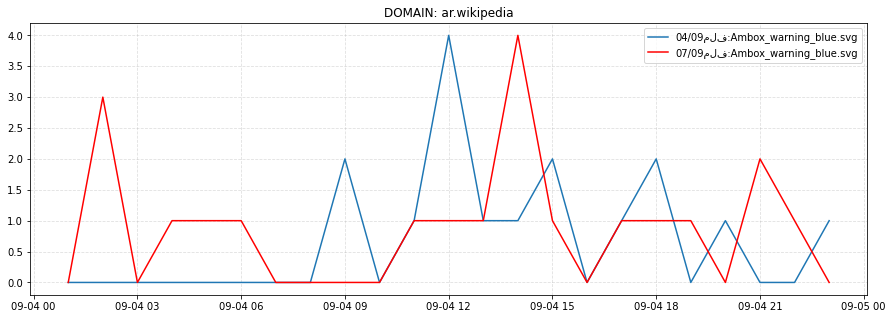

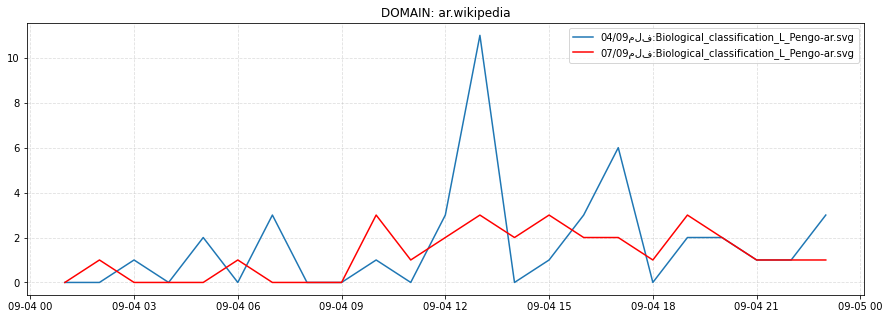

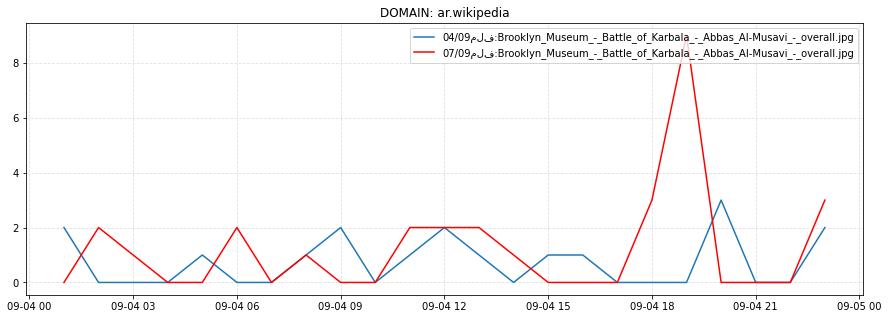

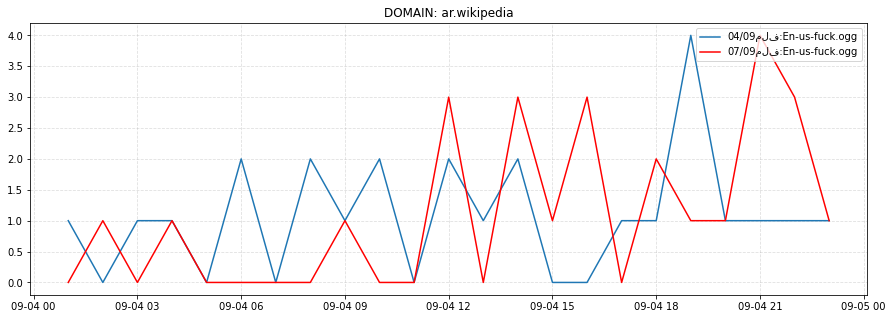

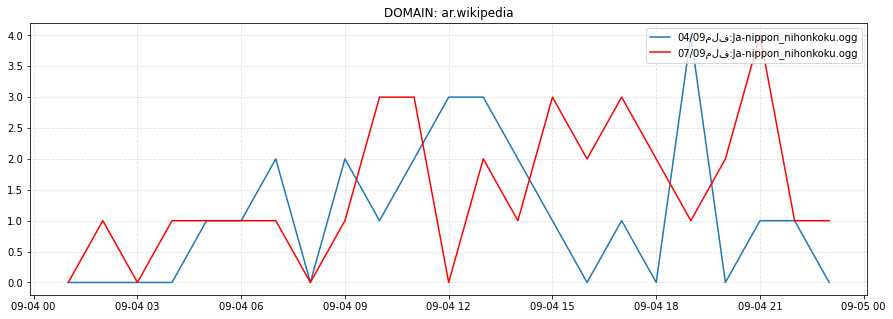

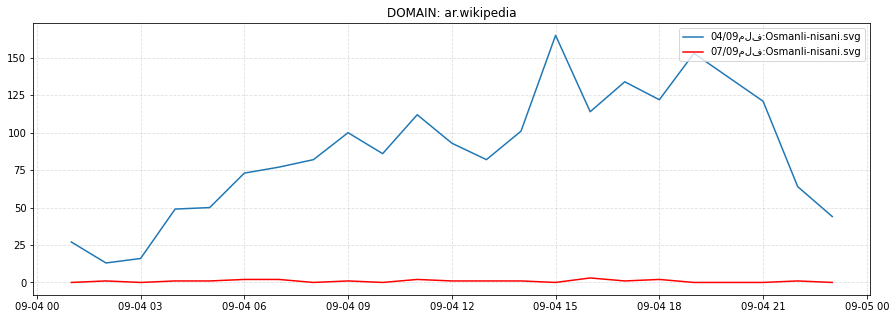

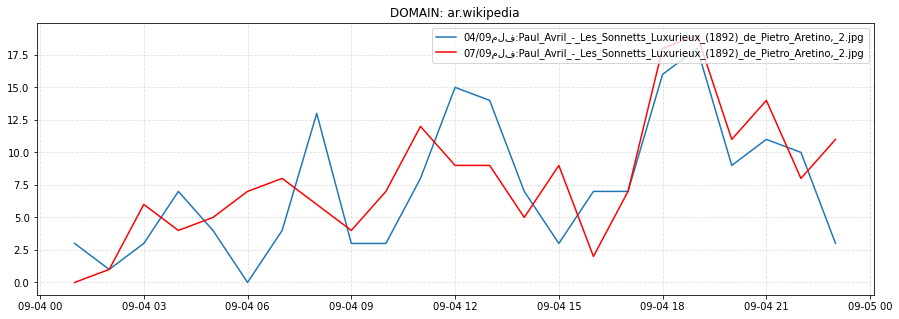

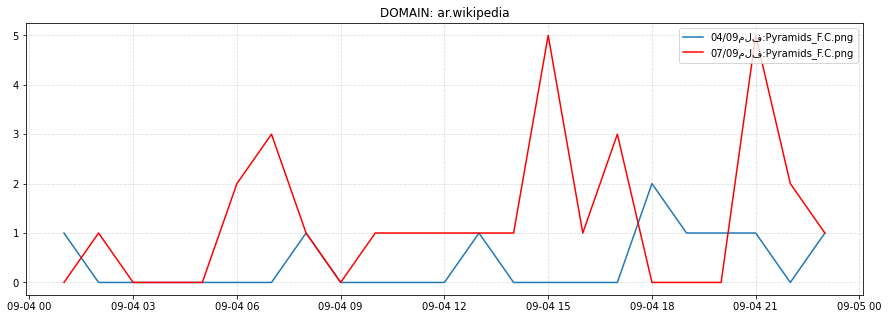

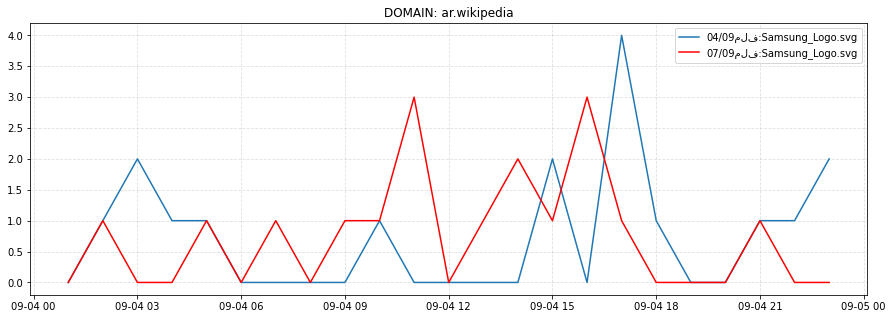

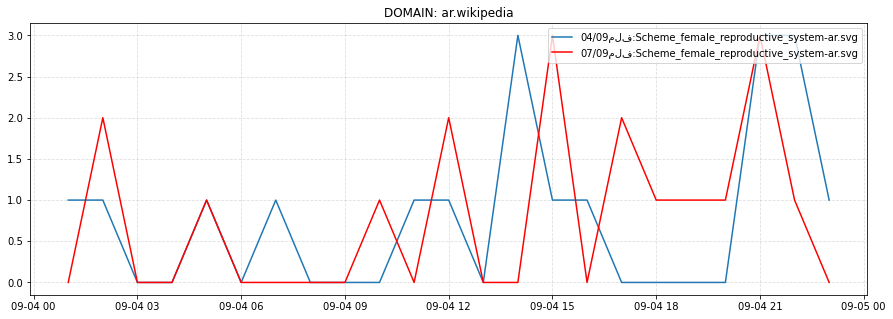

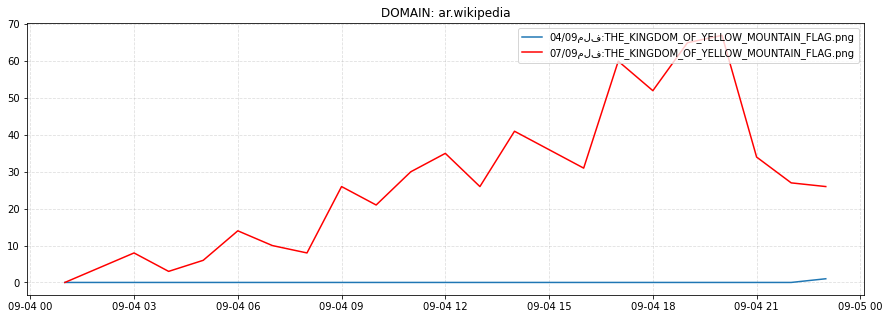

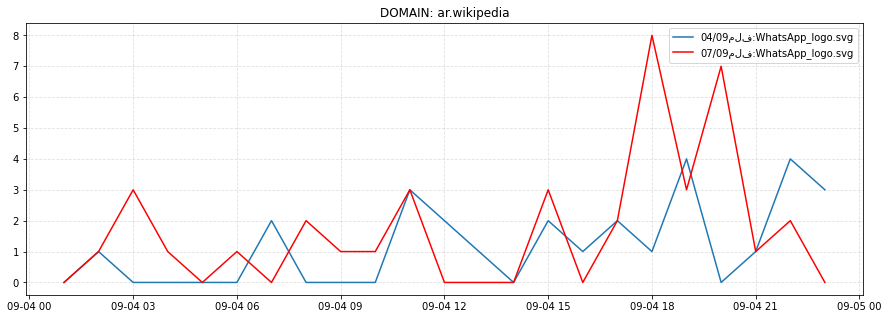

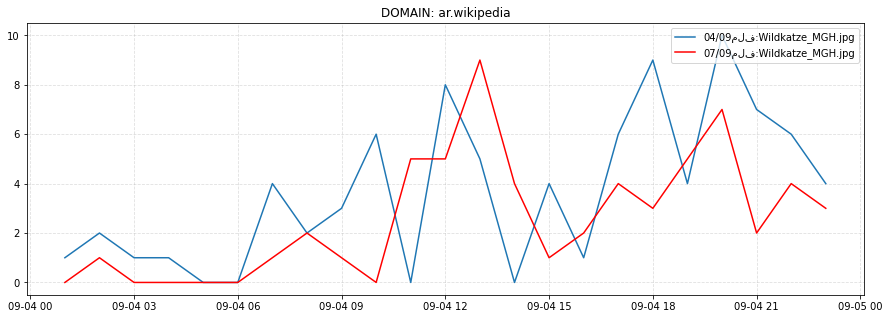

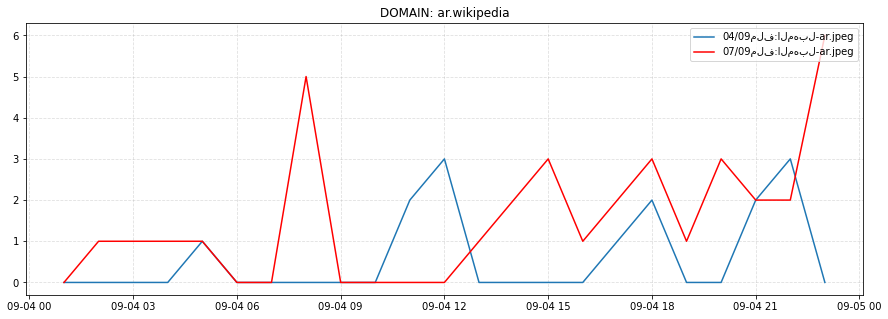

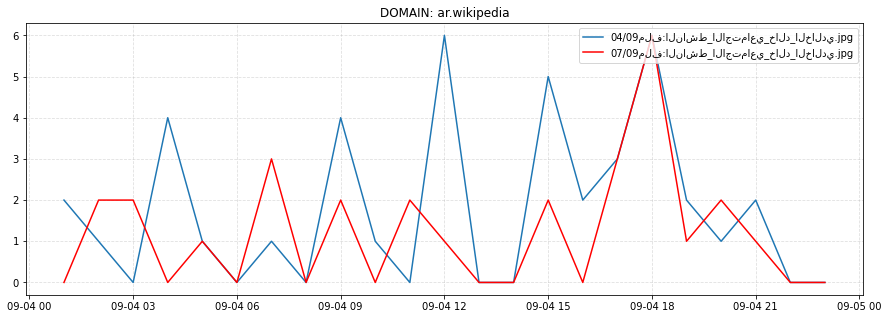

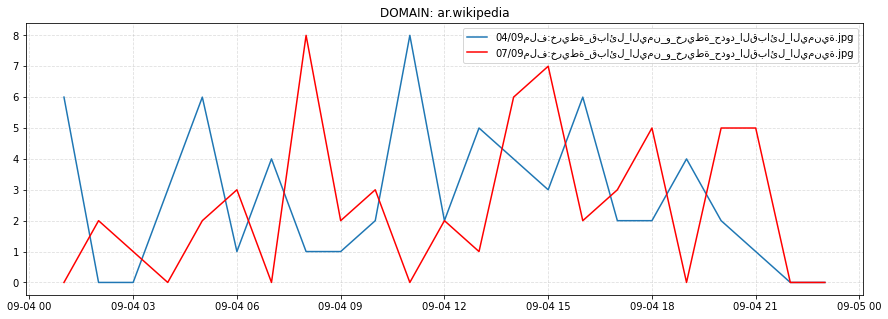

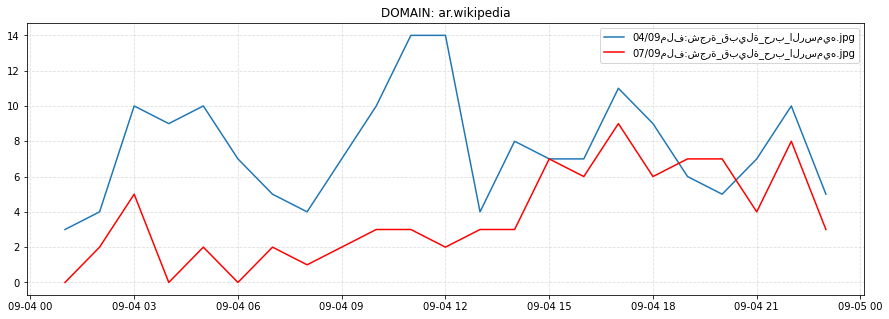

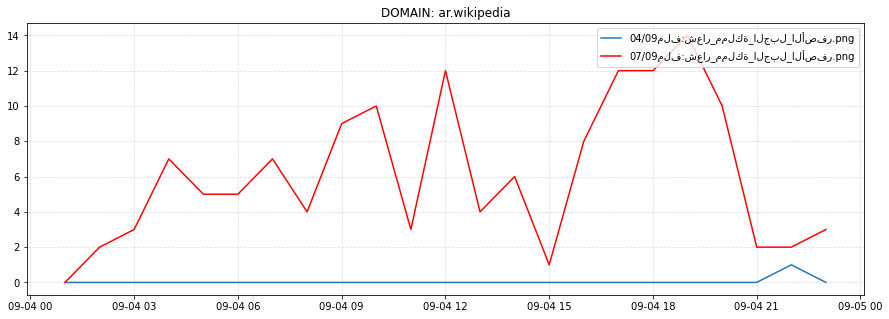

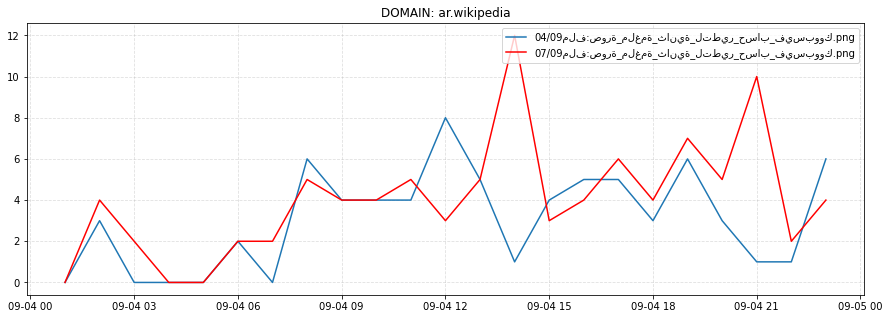

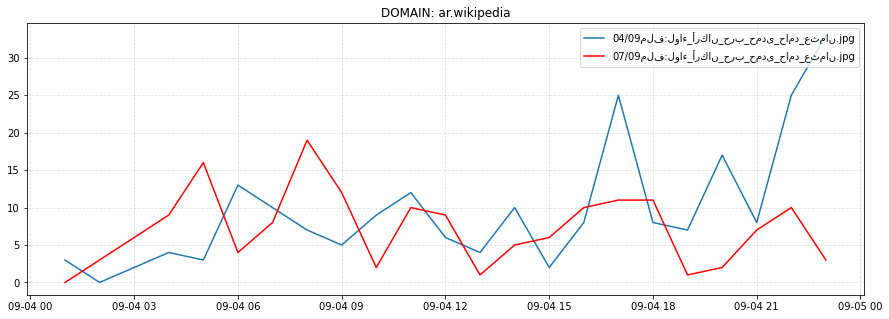

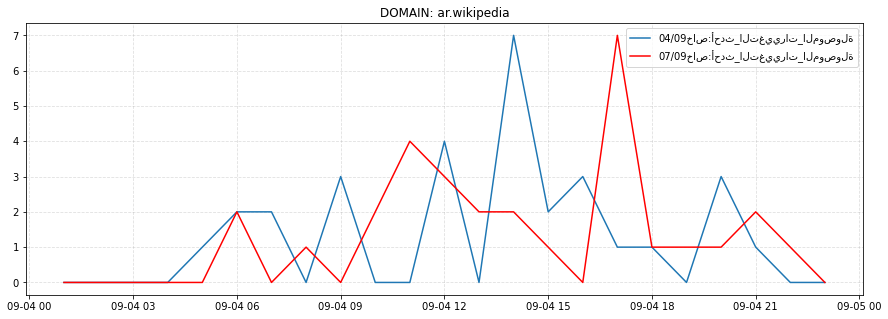

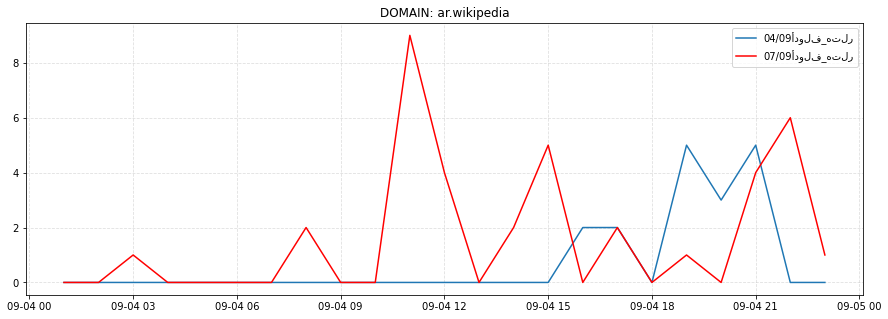

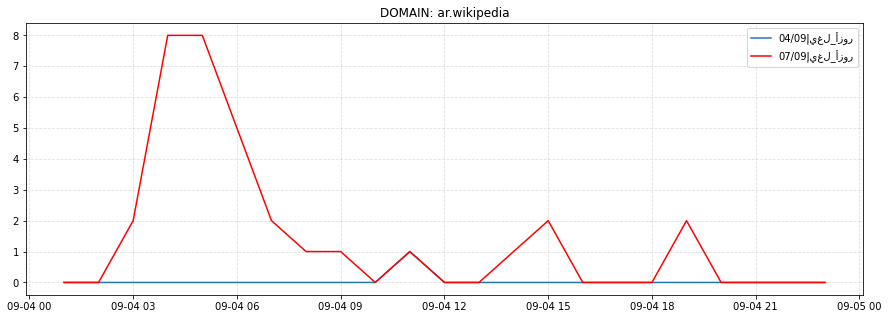

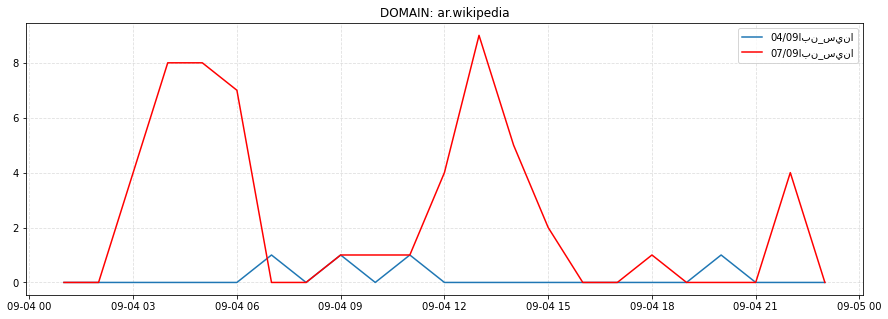

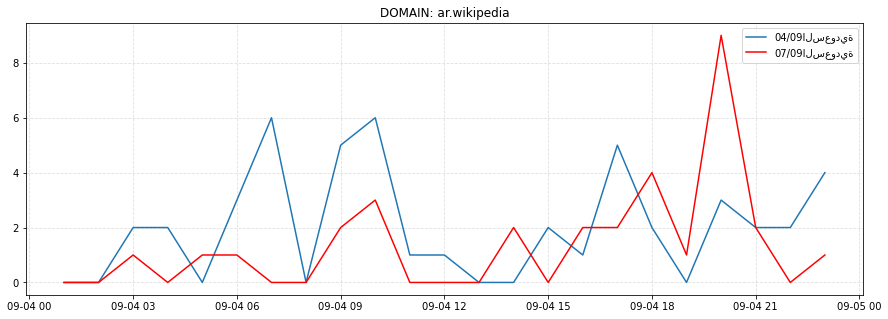

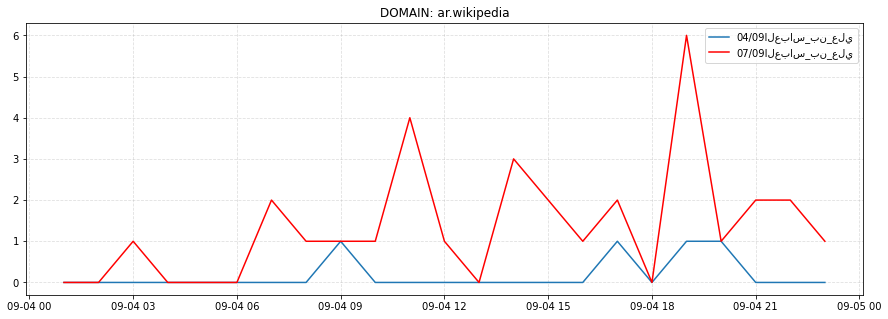

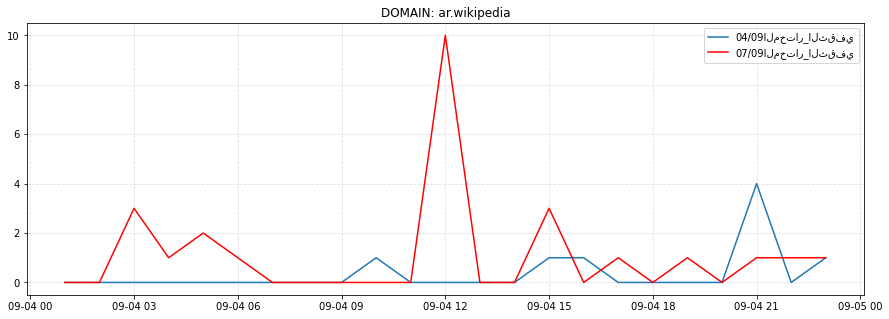

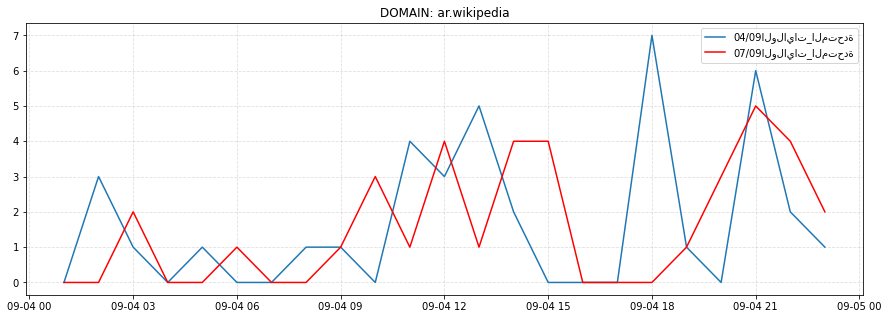

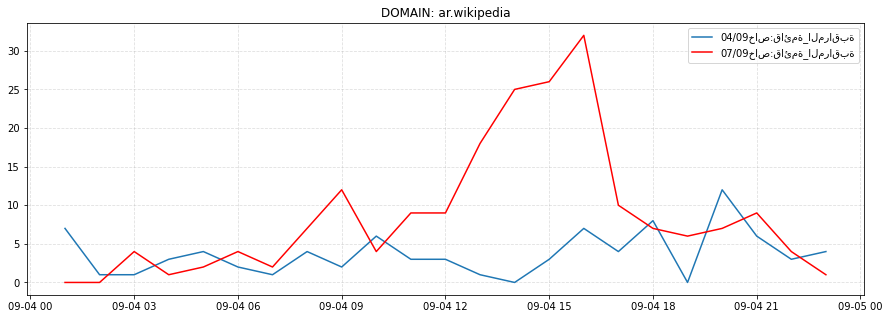

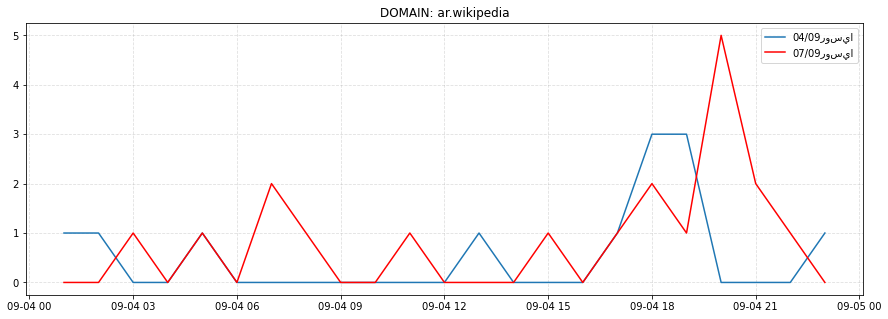

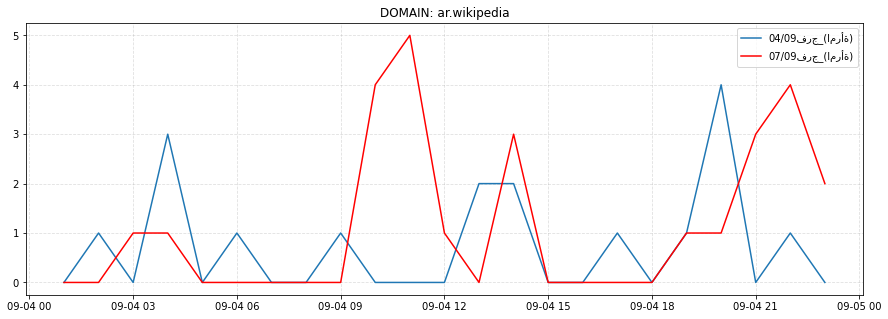

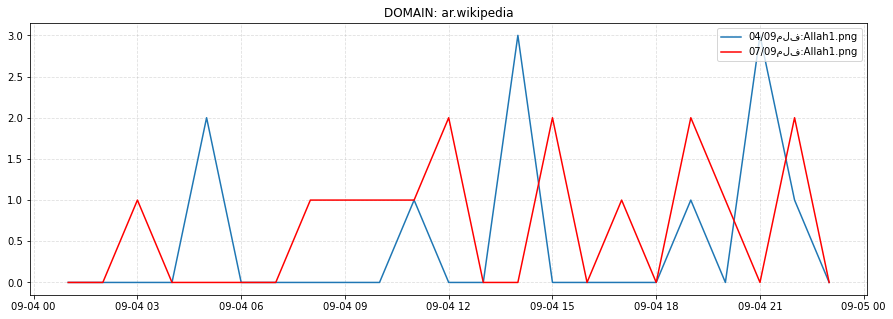

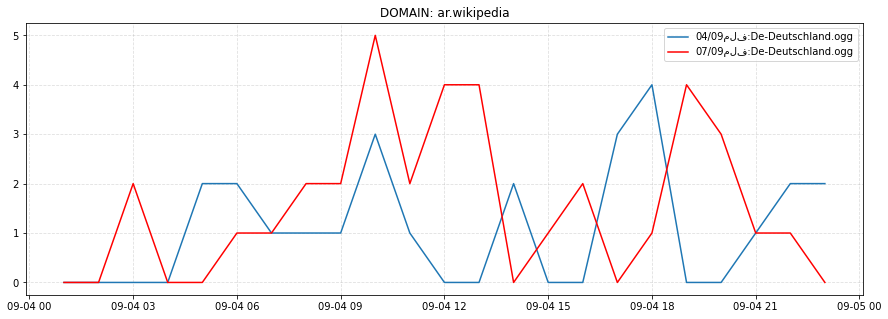

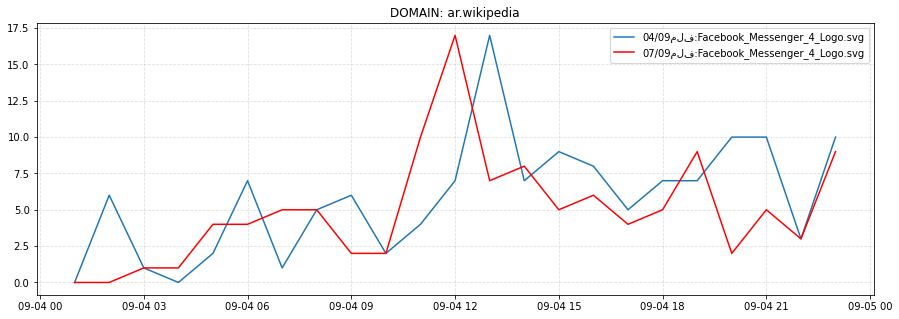

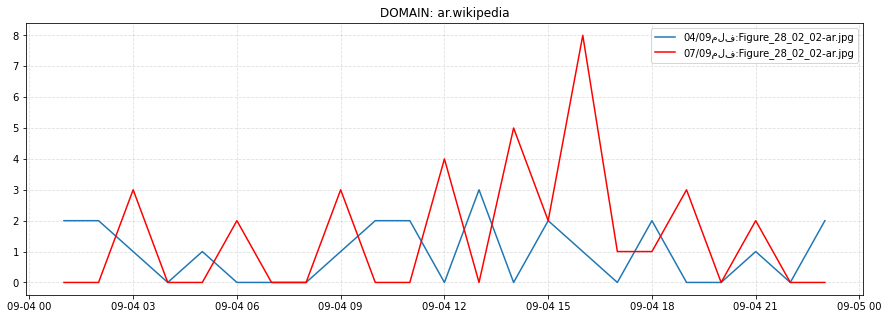

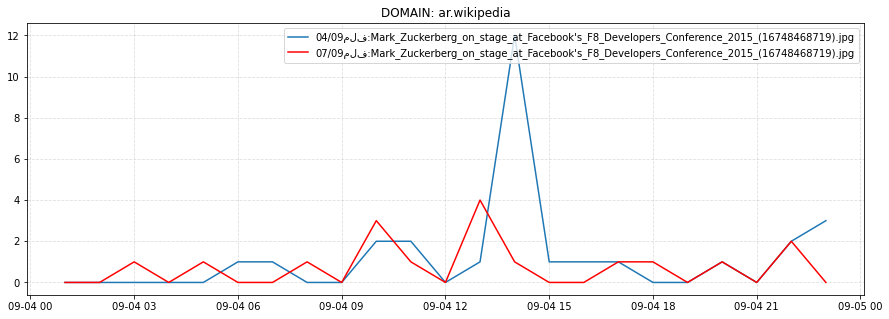

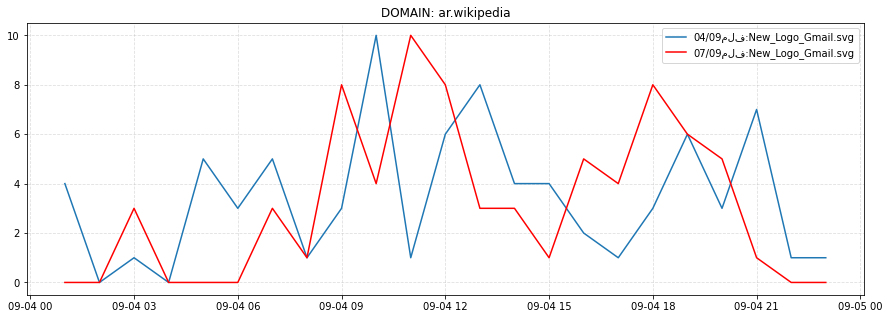

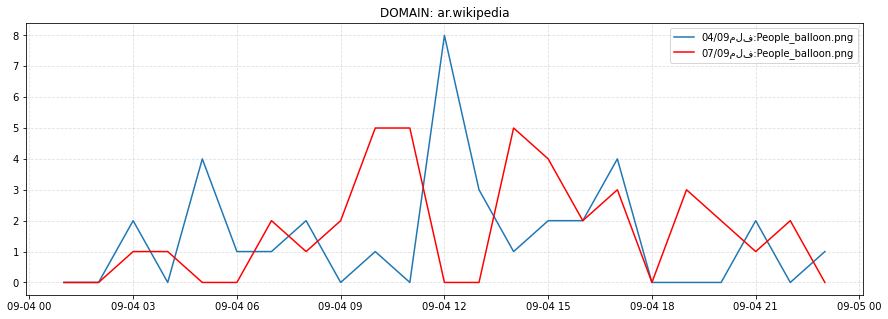

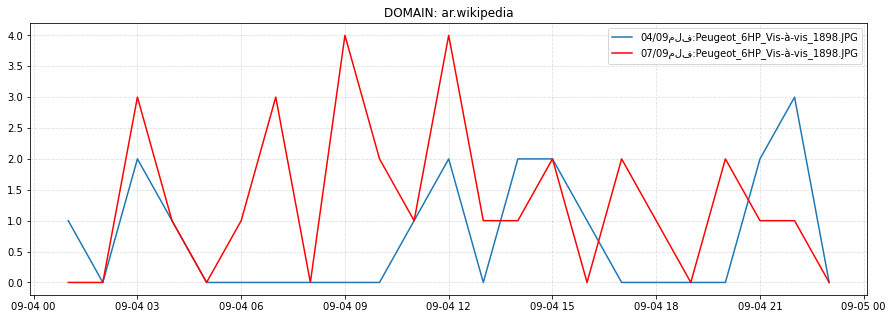

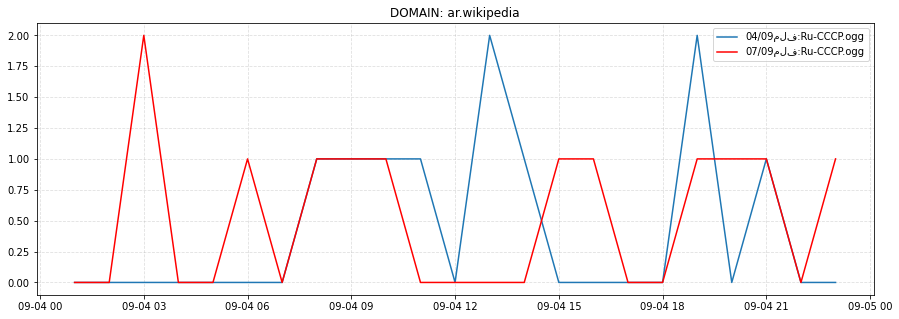

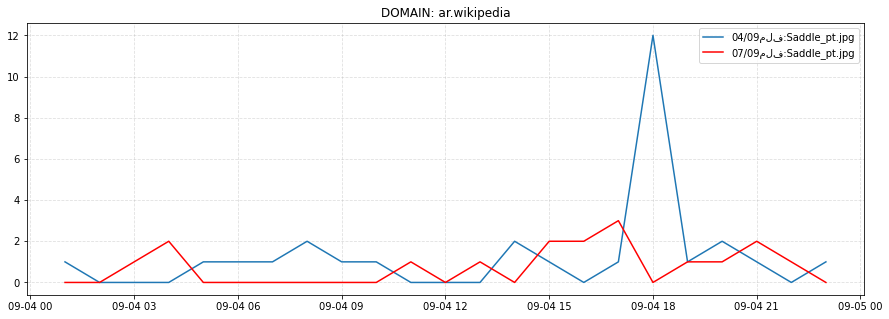

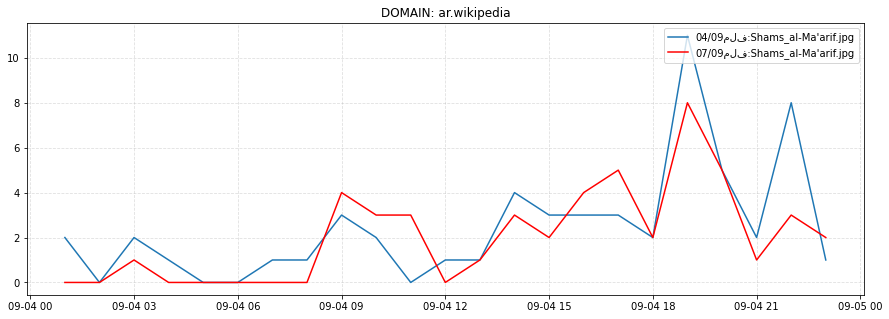

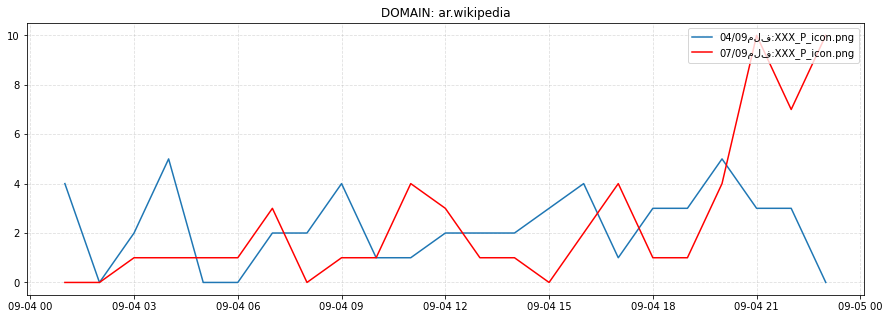

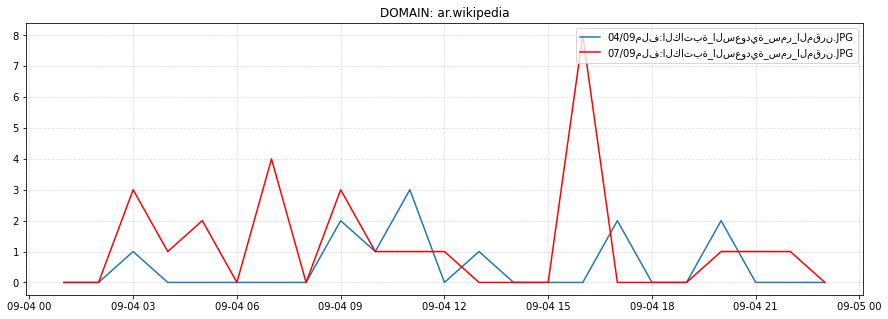

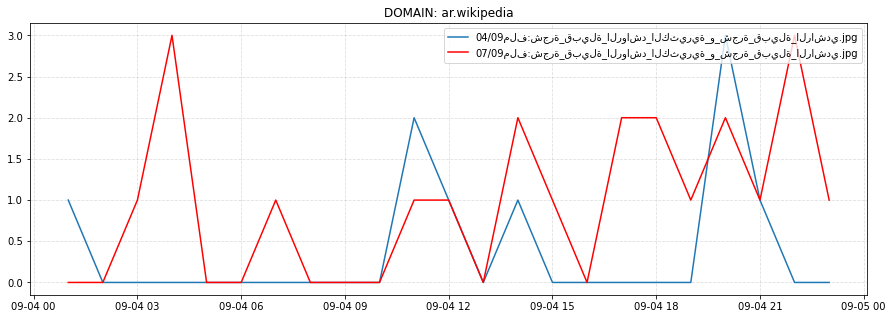

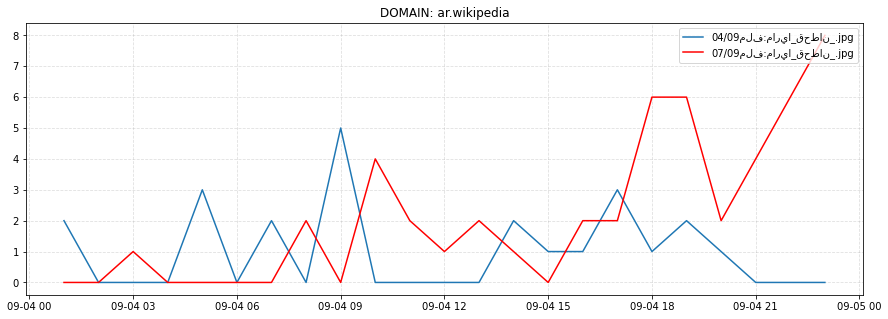

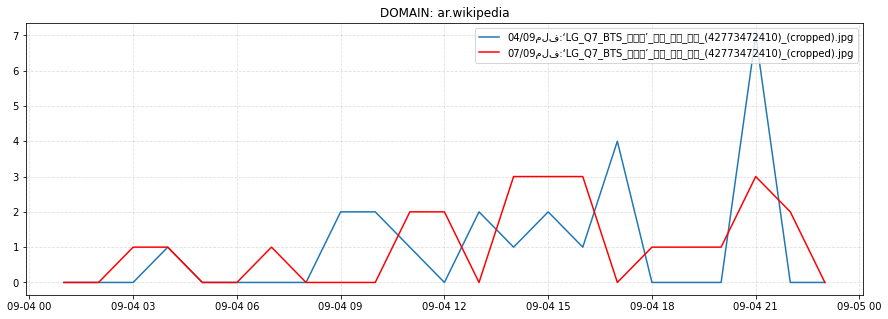

In [266]:
traffic = "user"

for i, domain in enumerate(unique_domains_df2[30:31]):
    df1_temp = df1[df1["domain"]==domain]
    df2_temp = df2[df2["domain"]==domain]

    unique_title_perdomain = np.array(df2_temp.title.unique())
    k=0
    
    for j, title in enumerate(unique_title_perdomain):
        
        df1_temp_title = df1_temp[(df1_temp["title"]==title) & (df1_temp["trafficType"]==traffic)]
        df2_temp_title = df2_temp[(df2_temp["title"]==title) & (df2_temp["trafficType"]==traffic)]

        if (df1_temp_title.shape[0] != 0) & (df2_temp_title.shape[0] !=0) & (df2_temp_title.shape[0] >10) & (df2_temp_title.CumCount.mean() > 1) :
                
            df1_temp_title_reindex = df1_temp_title.set_index("hour")
            df1_temp_title_reindex = df1_temp_title_reindex.reindex(pd.Index(range(1,24)))
            df1_temp_title_reindex.fillna(0, inplace=True)

            df2_temp_title_reindex = df2_temp_title.set_index("hour")
            df2_temp_title_reindex = df2_temp_title_reindex.reindex(pd.Index(range(1,24)))
            df2_temp_title_reindex.fillna(0, inplace=True)

            k = k + 1

            fig, ax1 = plt.subplots(figsize=(15,5))
            plt.title( ("DOMAIN: " + domain))
            ax1.plot(hours , df1_temp_title_reindex.CumCount, label=("04/09"+title))
            ax1.plot(hours , df2_temp_title_reindex.CumCount, color="r", label=("07/09"+title))
            ax1.legend(loc=1)
            ax1.grid(linestyle="--", alpha=0.4)
            
    plt.show()

In [ ]:
np.save('test3.npy', a)

# ENTROPY

In [228]:
# warnings.filterwarnings("ignore")

# traffic = "user"

# KLV_DIV = np.zeros((len(unique_domains_df2), 200))
# MI = np.zeros((len(unique_domains_df2), 200))
# TILES_PER_DOMAIN = np.zeros((len(unique_domains_df2), 200), dtype='S50')

# for i, domain in enumerate(unique_domains_df2[0:40]):
#     df1_temp = df1[df1["domain"]==domain]
#     df2_temp = df2[df2["domain"]==domain]

#     unique_title_perdomain = np.array(df2_temp.title.unique())
    
#     k=0
    
#     for j, title in enumerate(unique_title_perdomain):
        
#         df1_temp_title = df1_temp[(df1_temp["title"]==title) & (df1_temp["trafficType"]==traffic)]
#         df2_temp_title = df2_temp[(df2_temp["title"]==title) & (df2_temp["trafficType"]==traffic)]

#         if (df1_temp_title.shape[0] != 0) & (df2_temp_title.shape[0] !=0) & (df2_temp_title.shape[0] >10) & (df2_temp_title.CumCount.mean() > 1) :
#             k = k+1

#             df1_temp_title_reindex = df1_temp_title.set_index("hour")
#             df1_temp_title_reindex = df1_temp_title_reindex.reindex(pd.Index(range(1,24)))
#             df1_temp_title_reindex.fillna(0, inplace=True)

#             df2_temp_title_reindex = df2_temp_title.set_index("hour")
#             df2_temp_title_reindex = df2_temp_title_reindex.reindex(pd.Index(range(1,24)))
#             df2_temp_title_reindex.fillna(0, inplace=True)
            
#             x = df2_temp_title_reindex.CumCount.to_numpy()
#             y = df1_temp_title_reindex.CumCount.to_numpy()
#             x = x.reshape(-1,1)
#             y = y.reshape(-1,1)
            
#             MI[i,k] = mi(x,y, k=5)
#             KLV_DIV[i,k] = kldiv(x,y, k=5)
#             TILES_PER_DOMAIN[i,k] = title.encode('utf-8')
            

In [267]:
np.save("KLV_DIV.npy", KLV_DIV)
np.save("MI.npy", MI)
np.save("TILES_PER_DOMAIN.npy", TILES_PER_DOMAIN)

In [231]:
KLV_DIV_NOZEROS = KLV_DIV
KLV_DIV_NOZEROS[KLV_DIV_NOZEROS==0] = np.nan

MI_NOZEROS = MI
MI_NOZEROS[MI_NOZEROS==0] = np.nan

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

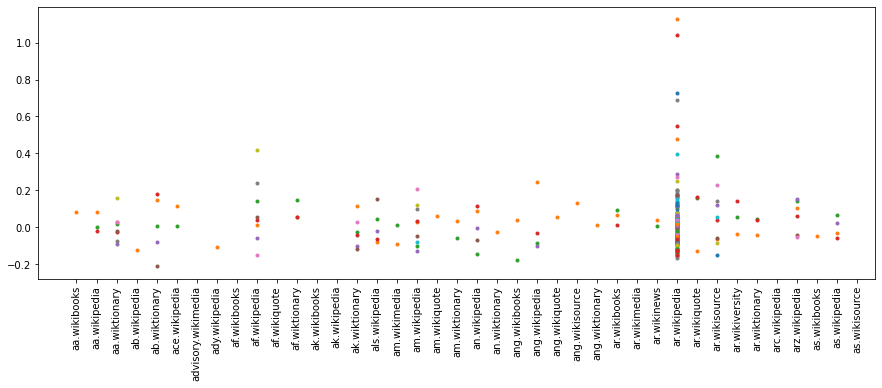

In [234]:
plt.figure(figsize=(15,5))
plt.plot(unique_domains_df2[0:40], MI_NOZEROS[0:40,::], ".")
plt.xticks(rotation=90)
# plt.xlim(0, np.nanmax(MI_NOZEROS))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

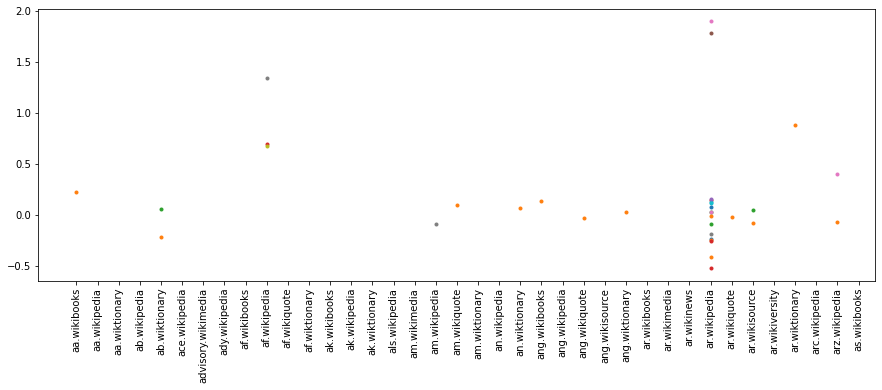

In [235]:
plt.figure(figsize=(15,5))
plt.plot(unique_domains_df2[0:40], KLV_DIV_NOZEROS[0:40,::], ".")
plt.xticks(rotation=90)

In [265]:
# KL_TEMP = KLV_DIV_NOZEROS

# KL_TEMP[KL_TEMP==np.inf] = 0
# np.nanargmax(KL_TEMP)
# TILES_PER_DOMAIN[np.nanargmax(KLV_DIV_NOZEROS)]
# np.unravel_index(np.nanargmax(KL_TEMP), shape=(len(unique_domains_df2), 200))
TILES_PER_DOMAIN[30,46]
# KLV_DIV_NOZEROS[30,46]

b'\xd9\x85\xd9\x84\xd9\x81:\xd9\x85\xd9\x85\xd9\x84\xd9\x83\xd8\xa9_\xd8\xa7\xd9\x84\xd8\xac\xd8\xa8\xd9\x84_\xd8\xa7\xd9\x84\xd8\xa3\xd8\xb5\xd9\x81\xd8\xb1.png'

In [262]:
days = np.array(range(1,31))
months = np.array(df1.month.unique())
years = np.array(df1.year.unique())

months_2018 = np.array([9,10,11])
traffics = np.array([None, "user", "spider"])

KLV_DIV_2019_09 = np.zeros((len(traffics), len(months_2018), len(days)))
MI_2019_09 = np.zeros((len(traffics), len(months_2018), len(days)))
CENTROPY_2019_09 = np.zeros((len(traffics), len(months_2018), len(days)))

for k, traffic in enumerate(traffics):
    for i, month in enumerate(months_2018):
        for j, day in enumerate(days):
            mean_kldiv = np.zeros(len(days))
            mean_mi = np.zeros(len(days))
            mean_ce = np.zeros(len(days))

            for l, day2 in enumerate(days):
                
                clear_output(wait=True)
                print("TRAFFIC: ", traffic)
                print("MONTH/DAY: ", month ,"/", day, "/", day2)

                x = df1.access_frequency[m1(df1, year=years[1], month=9, day=day, domain=None, traffic=traffic)].to_numpy()
                y = df1.access_frequency[m1(df1, year=years[0], month=month, day=day2, domain=None, traffic=traffic)].to_numpy()
                x = x.reshape(-1,1)
                y = y.reshape(-1,1)

                mean_kldiv[l] = kldiv(x,y, k=3)
                mean_mi[l] = mi(x,y, k=3)
                mean_ce[l] = centropy(x,y, k=3)

            KLV_DIV_2019_09[k,i,j] = np.nanmean(mean_kldiv[np.isfinite(mean_kldiv)])
            MI_2019_09[k,i,j] = np.nanmean(mean_mi[np.isfinite(mean_mi)])
            CENTROPY_2019_09[k,i,j] = np.nanmean(mean_ce[np.isfinite(mean_ce)])


TRAFFIC:  spider
MONTH/DAY:  11 / 30 / 30


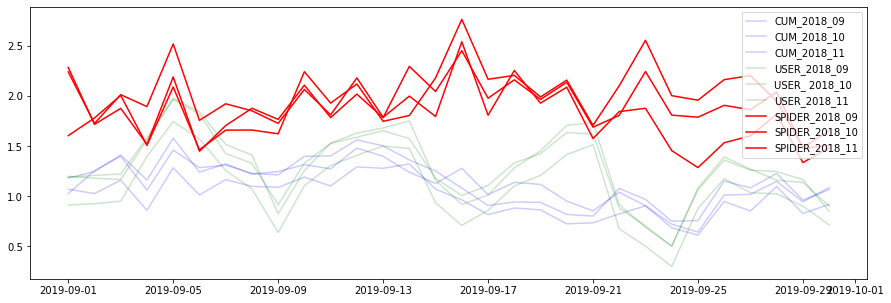

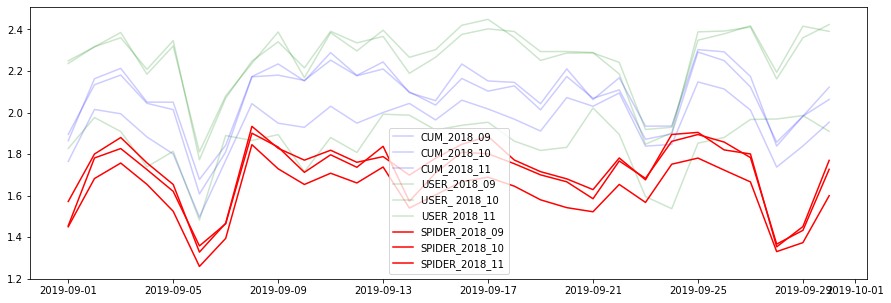

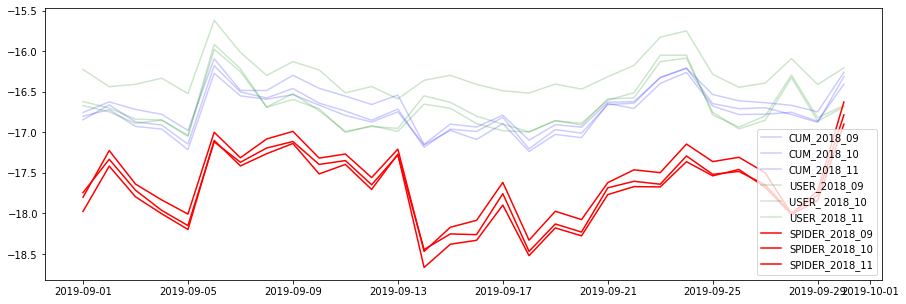

In [263]:
dates = pd.date_range(start=dt.datetime(2019,9,1), end=dt.datetime(2019,9,30), freq="D")

plt.figure(figsize=(15,5))
plt.plot(dates, KLV_DIV_2019_09[0, 0,::], alpha=0.2, color="b", label="CUM_2018_09")
plt.plot(dates, KLV_DIV_2019_09[0, 1,::], alpha=0.2, color="b", label="CUM_2018_10")
plt.plot(dates, KLV_DIV_2019_09[0, 2,::], alpha=0.2, color="b", label="CUM_2018_11")
plt.plot(dates, KLV_DIV_2019_09[1, 0,::], alpha=0.2, color="g", label="USER_2018_09")
plt.plot(dates, KLV_DIV_2019_09[1, 1,::], alpha=0.2, color="g", label="USER_ 2018_10")
plt.plot(dates, KLV_DIV_2019_09[1, 2,::], alpha=0.2, color="g", label="USER_2018_11")
plt.plot(dates, KLV_DIV_2019_09[2, 0,::], color="r", label="SPIDER_2018_09")
plt.plot(dates, KLV_DIV_2019_09[2, 1,::], color="r", label="SPIDER_2018_10")
plt.plot(dates, KLV_DIV_2019_09[2, 2,::], color="r", label="SPIDER_2018_11")

plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(dates, MI_2019_09[0, 0,::], alpha=0.2, color="b", label="CUM_2018_09")
plt.plot(dates, MI_2019_09[0, 1,::], alpha=0.2, color="b", label="CUM_2018_10")
plt.plot(dates, MI_2019_09[0, 2,::], alpha=0.2, color="b", label="CUM_2018_11")
plt.plot(dates, MI_2019_09[1, 0,::], alpha=0.2, color="g", label="USER_2018_09")
plt.plot(dates, MI_2019_09[1, 1,::], alpha=0.2, color="g", label="USER_ 2018_10")
plt.plot(dates, MI_2019_09[1, 2,::], alpha=0.2, color="g", label="USER_2018_11")
plt.plot(dates, MI_2019_09[2, 0,::], color="r", label="SPIDER_2018_09")
plt.plot(dates, MI_2019_09[2, 1,::], color="r", label="SPIDER_2018_10")
plt.plot(dates, MI_2019_09[2, 2,::], color="r", label="SPIDER_2018_11")

plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.plot(dates, CENTROPY_2019_09[0, 0,::], alpha=0.2, color="b", label="CUM_2018_09")
plt.plot(dates, CENTROPY_2019_09[0, 1,::], alpha=0.2, color="b", label="CUM_2018_10")
plt.plot(dates, CENTROPY_2019_09[0, 2,::], alpha=0.2, color="b", label="CUM_2018_11")
plt.plot(dates, CENTROPY_2019_09[1, 0,::], alpha=0.2, color="g", label="USER_2018_09")
plt.plot(dates, CENTROPY_2019_09[1, 1,::], alpha=0.2, color="g", label="USER_ 2018_10")
plt.plot(dates, CENTROPY_2019_09[1, 2,::], alpha=0.2, color="g", label="USER_2018_11")
plt.plot(dates, CENTROPY_2019_09[2, 0,::], color="r", label="SPIDER_2018_09")
plt.plot(dates, CENTROPY_2019_09[2, 1,::], color="r", label="SPIDER_2018_10")
plt.plot(dates, CENTROPY_2019_09[2, 2,::], color="r", label="SPIDER_2018_11")

plt.legend()
plt.show()


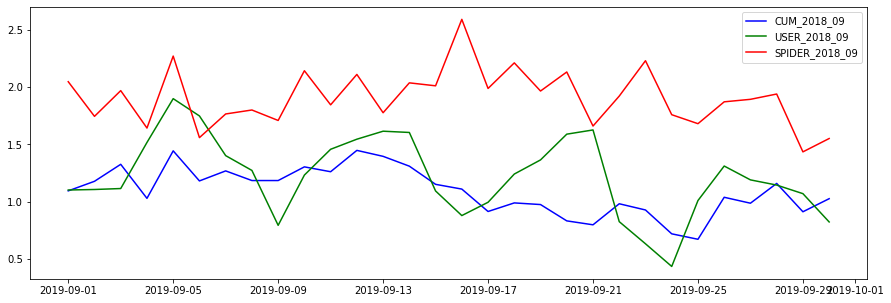

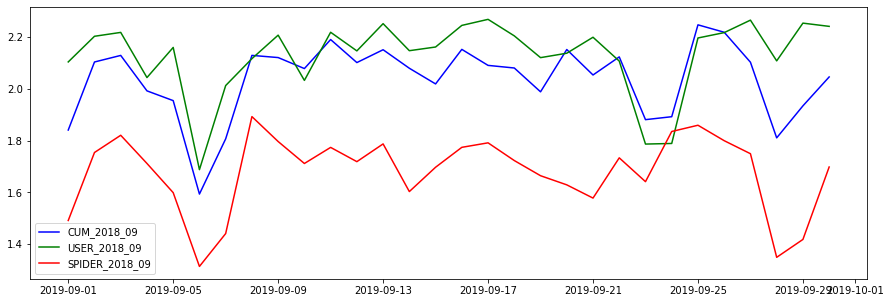

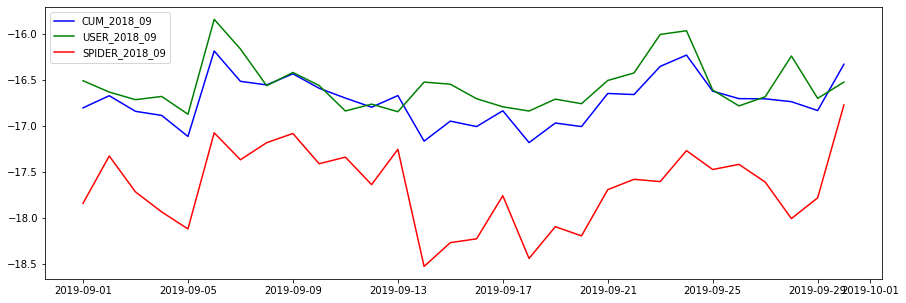

In [264]:
plt.figure(figsize=(15,5))
plt.plot(dates, np.mean(KLV_DIV_2019_09[0,::,::], axis=0), color="b", label="CUM_2018_09")
plt.plot(dates, np.mean(KLV_DIV_2019_09[1,::,::], axis=0), color="g", label="USER_2018_09")
plt.plot(dates, np.mean(KLV_DIV_2019_09[2,::,::], axis=0), color="r", label="SPIDER_2018_09")

plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.plot(dates, np.mean(MI_2019_09[0,::,::], axis=0), color="b", label="CUM_2018_09")
plt.plot(dates, np.mean(MI_2019_09[1,::,::], axis=0), color="g", label="USER_2018_09")
plt.plot(dates, np.mean(MI_2019_09[2,::,::], axis=0), color="r", label="SPIDER_2018_09")

plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(dates, np.mean(CENTROPY_2019_09[0,::,::], axis=0), color="b", label="CUM_2018_09")
plt.plot(dates, np.mean(CENTROPY_2019_09[1,::,::], axis=0), color="g", label="USER_2018_09")
plt.plot(dates, np.mean(CENTROPY_2019_09[2,::,::], axis=0), color="r", label="SPIDER_2018_09")

plt.legend()
plt.show()



In [265]:
days = np.array(range(1,31))
months = np.array(df1.month.unique())
years = np.array(df1.year.unique())

months_2018 = np.array([9,10,11])
traffics = np.array([None, "user", "spider"])

KLV_DIV_2019_08 = np.zeros((len(traffics), len(months_2018), len(days)))
MI_2019_08 = np.zeros((len(traffics), len(months_2018), len(days)))
CENTROPY_2019_08 = np.zeros((len(traffics), len(months_2018), len(days)))

for k, traffic in enumerate(traffics):
    for i, month in enumerate(months_2018):
        for j, day in enumerate(days):
            mean_kldiv = np.zeros(len(days))
            mean_mi = np.zeros(len(days))
            mean_ce = np.zeros(len(days))

            for l, day2 in enumerate(days):
                
                clear_output(wait=True)
                print("TRAFFIC: ", traffic)
                print("MONTH/DAY: ", month ,"/", day, "/", day2)

                x = df1.access_frequency[m1(df1, year=years[1], month=8, day=day, domain=None, traffic=traffic)].to_numpy()
                y = df1.access_frequency[m1(df1, year=years[0], month=month, day=day2, domain=None, traffic=traffic)].to_numpy()
                x = x.reshape(-1,1)
                y = y.reshape(-1,1)

                mean_kldiv[l] = kldiv(x,y, k=3)
                mean_mi[l] = mi(x,y, k=3)
                mean_ce[l] = centropy(x,y, k=3)

            KLV_DIV_2019_08[k,i,j] = np.nanmean(mean_kldiv[np.isfinite(mean_kldiv)])
            MI_2019_08[k,i,j] = np.nanmean(mean_mi[np.isfinite(mean_mi)])
            CENTROPY_2019_08[k,i,j] = np.nanmean(mean_ce[np.isfinite(mean_ce)])


TRAFFIC:  spider
MONTH/DAY:  11 / 30 / 30


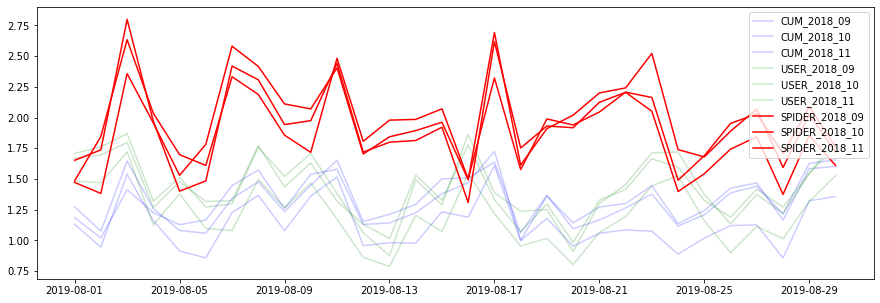

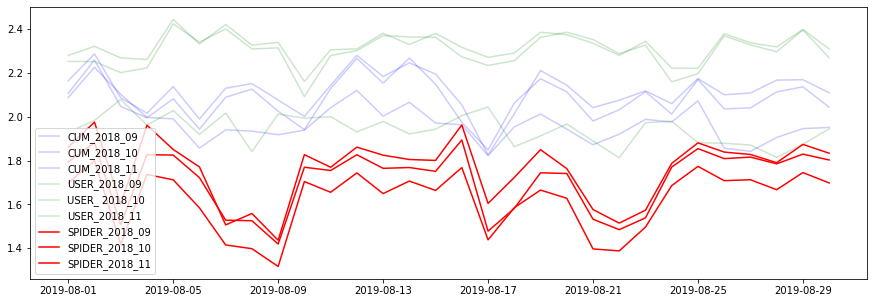

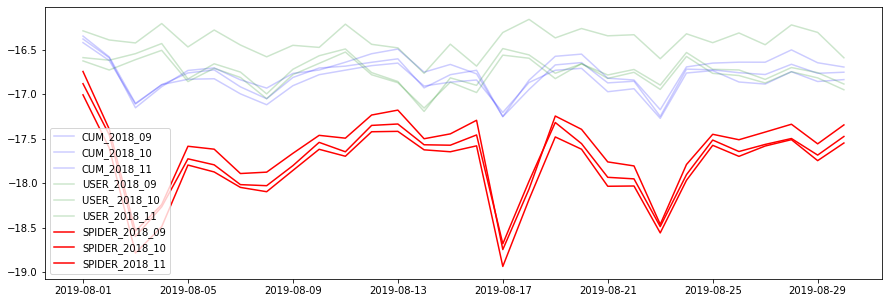

In [266]:
dates = pd.date_range(start=dt.datetime(2019,8,1), end=dt.datetime(2019,8,30), freq="D")
plt.figure(figsize=(15,5))
plt.plot(dates, KLV_DIV_2019_08[0, 0,::], alpha=0.2, color="b", label="CUM_2018_09")
plt.plot(dates, KLV_DIV_2019_08[0, 1,::], alpha=0.2, color="b", label="CUM_2018_10")
plt.plot(dates, KLV_DIV_2019_08[0, 2,::], alpha=0.2, color="b", label="CUM_2018_11")
plt.plot(dates, KLV_DIV_2019_08[1, 0,::], alpha=0.2, color="g", label="USER_2018_09")
plt.plot(dates, KLV_DIV_2019_08[1, 1,::], alpha=0.2, color="g", label="USER_ 2018_10")
plt.plot(dates, KLV_DIV_2019_08[1, 2,::], alpha=0.2, color="g", label="USER_2018_11")
plt.plot(dates, KLV_DIV_2019_08[2, 0,::], color="r", label="SPIDER_2018_09")
plt.plot(dates, KLV_DIV_2019_08[2, 1,::], color="r", label="SPIDER_2018_10")
plt.plot(dates, KLV_DIV_2019_08[2, 2,::], color="r", label="SPIDER_2018_11")

plt.legend()
plt.show()

dates = pd.date_range(start=dt.datetime(2019,8,1), end=dt.datetime(2019,8,30), freq="D")
plt.figure(figsize=(15,5))
plt.plot(dates, MI_2019_08[0, 0,::], alpha=0.2, color="b", label="CUM_2018_09")
plt.plot(dates, MI_2019_08[0, 1,::], alpha=0.2, color="b", label="CUM_2018_10")
plt.plot(dates, MI_2019_08[0, 2,::], alpha=0.2, color="b", label="CUM_2018_11")
plt.plot(dates, MI_2019_08[1, 0,::], alpha=0.2, color="g", label="USER_2018_09")
plt.plot(dates, MI_2019_08[1, 1,::], alpha=0.2, color="g", label="USER_ 2018_10")
plt.plot(dates, MI_2019_08[1, 2,::], alpha=0.2, color="g", label="USER_2018_11")
plt.plot(dates, MI_2019_08[2, 0,::], color="r", label="SPIDER_2018_09")
plt.plot(dates, MI_2019_08[2, 1,::], color="r", label="SPIDER_2018_10")
plt.plot(dates, MI_2019_08[2, 2,::], color="r", label="SPIDER_2018_11")

plt.legend()
plt.show()


dates = pd.date_range(start=dt.datetime(2019,8,1), end=dt.datetime(2019,8,30), freq="D")
plt.figure(figsize=(15,5))
plt.plot(dates, CENTROPY_2019_08[0, 0,::], alpha=0.2, color="b", label="CUM_2018_09")
plt.plot(dates, CENTROPY_2019_08[0, 1,::], alpha=0.2, color="b", label="CUM_2018_10")
plt.plot(dates, CENTROPY_2019_08[0, 2,::], alpha=0.2, color="b", label="CUM_2018_11")
plt.plot(dates, CENTROPY_2019_08[1, 0,::], alpha=0.2, color="g", label="USER_2018_09")
plt.plot(dates, CENTROPY_2019_08[1, 1,::], alpha=0.2, color="g", label="USER_ 2018_10")
plt.plot(dates, CENTROPY_2019_08[1, 2,::], alpha=0.2, color="g", label="USER_2018_11")
plt.plot(dates, CENTROPY_2019_08[2, 0,::], color="r", label="SPIDER_2018_09")
plt.plot(dates, CENTROPY_2019_08[2, 1,::], color="r", label="SPIDER_2018_10")
plt.plot(dates, CENTROPY_2019_08[2, 2,::], color="r", label="SPIDER_2018_11")

plt.legend()
plt.show()



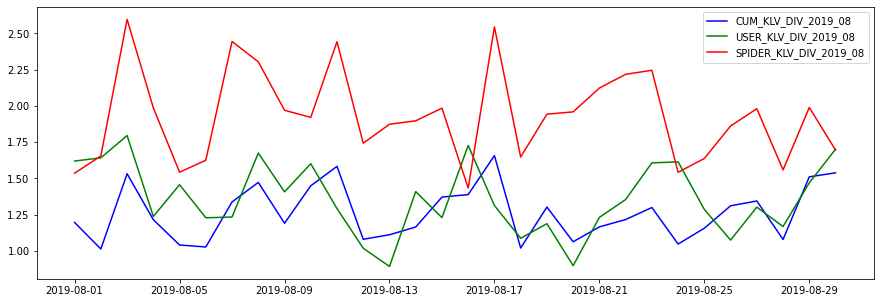

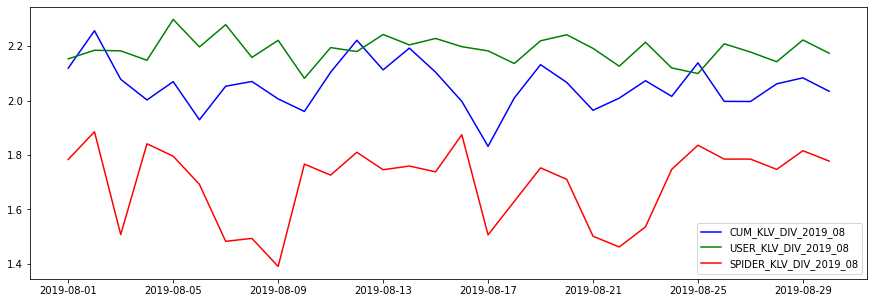

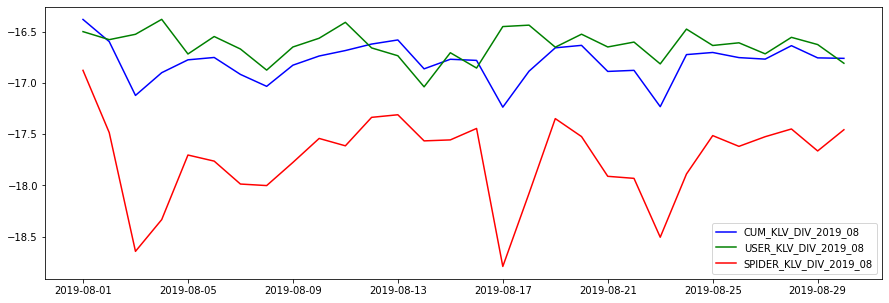

In [267]:
plt.figure(figsize=(15,5))
plt.plot(dates, np.mean(KLV_DIV_2019_08[0,::,::], axis=0), color="b", label="CUM_KLV_DIV_2019_08")
plt.plot(dates, np.mean(KLV_DIV_2019_08[1,::,::], axis=0), color="g", label="USER_KLV_DIV_2019_08")
plt.plot(dates, np.mean(KLV_DIV_2019_08[2,::,::], axis=0), color="r", label="SPIDER_KLV_DIV_2019_08")

plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(dates, np.mean(MI_2019_08[0,::,::], axis=0), color="b", label="CUM_KLV_DIV_2019_08")
plt.plot(dates, np.mean(MI_2019_08[1,::,::], axis=0), color="g", label="USER_KLV_DIV_2019_08")
plt.plot(dates, np.mean(MI_2019_08[2,::,::], axis=0), color="r", label="SPIDER_KLV_DIV_2019_08")

plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.plot(dates, np.mean(CENTROPY_2019_08[0,::,::], axis=0), color="b", label="CUM_KLV_DIV_2019_08")
plt.plot(dates, np.mean(CENTROPY_2019_08[1,::,::], axis=0), color="g", label="USER_KLV_DIV_2019_08")
plt.plot(dates, np.mean(CENTROPY_2019_08[2,::,::], axis=0), color="r", label="SPIDER_KLV_DIV_2019_08")

plt.legend()
plt.show()



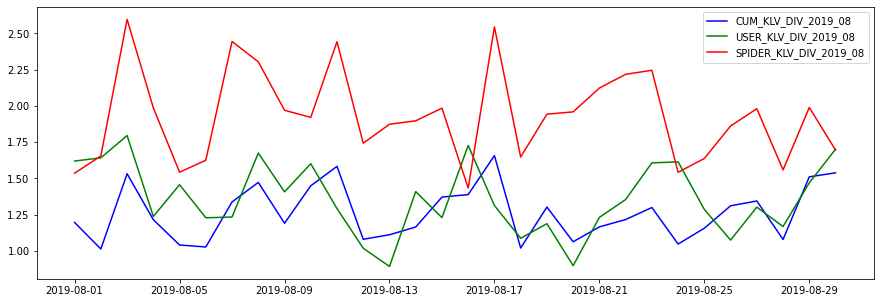

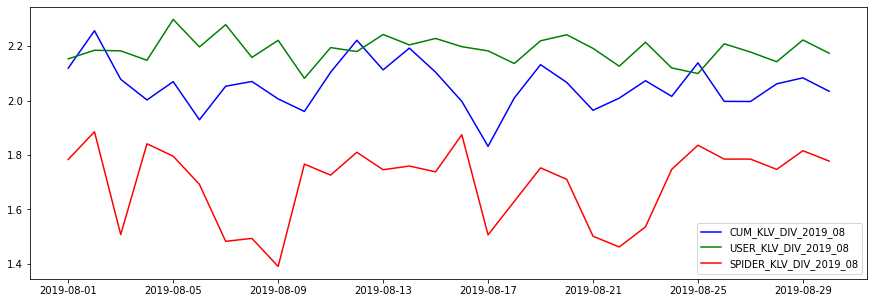

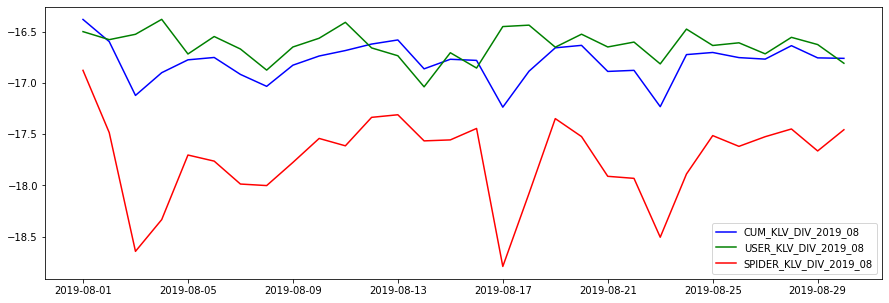

In [268]:
plt.figure(figsize=(15,5))
plt.plot(dates, np.mean(KLV_DIV_2019_08[0,::,::], axis=0), color="b", label="CUM_KLV_DIV_2019_08")
plt.plot(dates, np.mean(KLV_DIV_2019_08[1,::,::], axis=0), color="g", label="USER_KLV_DIV_2019_08")
plt.plot(dates, np.mean(KLV_DIV_2019_08[2,::,::], axis=0), color="r", label="SPIDER_KLV_DIV_2019_08")

plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(dates, np.mean(MI_2019_08[0,::,::], axis=0), color="b", label="CUM_KLV_DIV_2019_08")
plt.plot(dates, np.mean(MI_2019_08[1,::,::], axis=0), color="g", label="USER_KLV_DIV_2019_08")
plt.plot(dates, np.mean(MI_2019_08[2,::,::], axis=0), color="r", label="SPIDER_KLV_DIV_2019_08")

plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.plot(dates, np.mean(CENTROPY_2019_08[0,::,::], axis=0), color="b", label="CUM_KLV_DIV_2019_08")
plt.plot(dates, np.mean(CENTROPY_2019_08[1,::,::], axis=0), color="g", label="USER_KLV_DIV_2019_08")
plt.plot(dates, np.mean(CENTROPY_2019_08[2,::,::], axis=0), color="r", label="SPIDER_KLV_DIV_2019_08")

plt.legend()
plt.show()



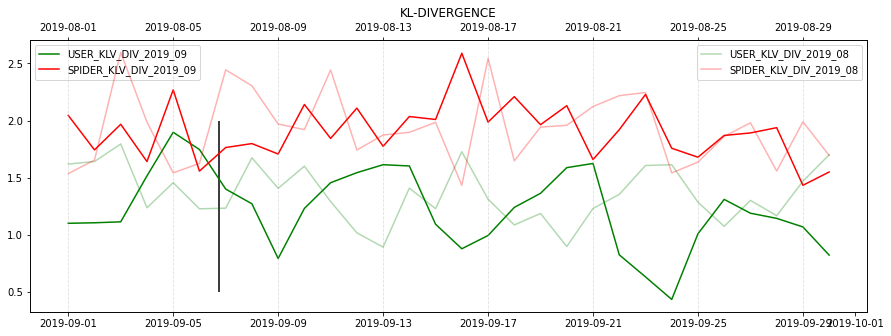

In [269]:
dates_2019_08 = pd.date_range(start=dt.datetime(2019,8,1), end=dt.datetime(2019,8,30), freq="D")
dates_2019_09 = pd.date_range(start=dt.datetime(2019,9,1), end=dt.datetime(2019,9,30), freq="D")

fig, ax1 = plt.subplots(figsize=(15,5))

plt.title("KL-DIVERGENCE")
# ax1.plot(dates_2019_09, np.mean(KLV_DIV_2019_09[0,::,::], axis=0), color="b", label="CUM_KLV_DIV_2019_08")
ax1.plot(dates_2019_09, np.mean(KLV_DIV_2019_09[1,::,::], axis=0), color="g", label="USER_KLV_DIV_2019_09")
ax1.plot(dates_2019_09, np.mean(KLV_DIV_2019_09[2,::,::], axis=0), color="r", label="SPIDER_KLV_DIV_2019_09")
ax1.vlines(dt.datetime(2019,9,6,17,40,0), ymin=0.5, ymax=2, color="black")
ax1.legend(loc=2)

ax2 = ax1.twiny()
# ax2.plot(dates_2019_08, np.mean(KLV_DIV_2019_08[0,::,::], axis=0), alpha=0.3, color="b", label="CUM_KLV_DIV_2019_08")
ax2.plot(dates_2019_08, np.mean(KLV_DIV_2019_08[1,::,::], axis=0), alpha=0.3, color="g", label="USER_KLV_DIV_2019_08")
ax2.plot(dates_2019_08, np.mean(KLV_DIV_2019_08[2,::,::], axis=0), alpha=0.3, color="r", label="SPIDER_KLV_DIV_2019_08")
ax2.legend(loc=1)

plt.grid(linestyle="--", alpha=0.4)
plt.show()


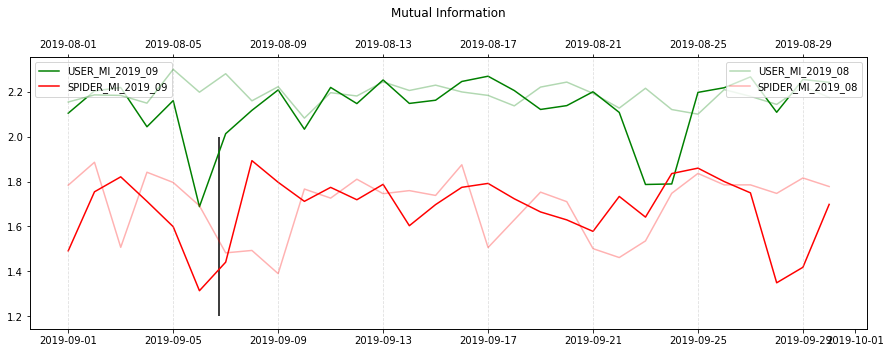

In [270]:
dates_2019_08 = pd.date_range(start=dt.datetime(2019,8,1), end=dt.datetime(2019,8,30), freq="D")
dates_2019_09 = pd.date_range(start=dt.datetime(2019,9,1), end=dt.datetime(2019,9,30), freq="D")

fig, ax1 = plt.subplots(figsize=(15,5))

plt.title("Mutual Information", pad=40)
# ax1.plot(dates_2019_09, np.mean(MI_2019_09[0,::,::], axis=0), color="b", label="CUM_KLV_DIV_2019_08")
ax1.plot(dates_2019_09, np.mean(MI_2019_09[1,::,::], axis=0), color="g", label="USER_MI_2019_09")
ax1.plot(dates_2019_09, np.mean(MI_2019_09[2,::,::], axis=0), color="r", label="SPIDER_MI_2019_09")
ax1.vlines(dt.datetime(2019,9,6,17,40,0), ymin=1.2, ymax=2, color="black")
ax1.legend(loc=2)

ax2 = ax1.twiny()
# ax2.plot(dates_2019_08, np.mean(MI_2019_08[0,::,::], axis=0), alpha=0.3, color="b", label="CUM_KLV_DIV_2019_08")
ax2.plot(dates_2019_08, np.mean(MI_2019_08[1,::,::], axis=0), alpha=0.3, color="g", label="USER_MI_2019_08")
ax2.plot(dates_2019_08, np.mean(MI_2019_08[2,::,::], axis=0), alpha=0.3, color="r", label="SPIDER_MI_2019_08")
ax2.legend(loc=1)

plt.grid(linestyle="--", alpha=0.4)
plt.show()


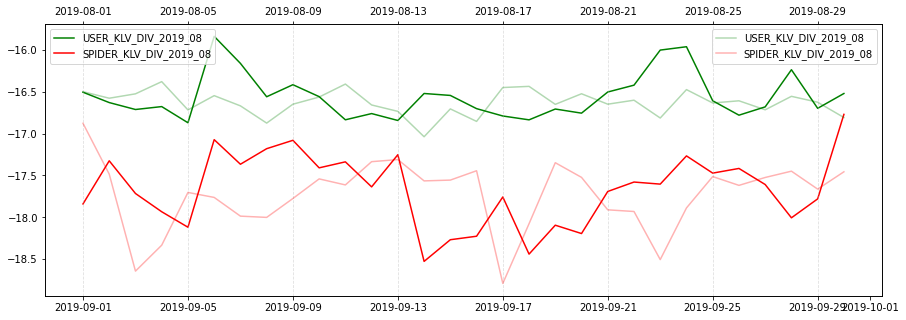

In [271]:
dates_2019_08 = pd.date_range(start=dt.datetime(2019,8,1), end=dt.datetime(2019,8,30), freq="D")
dates_2019_09 = pd.date_range(start=dt.datetime(2019,9,1), end=dt.datetime(2019,9,30), freq="D")

fig, ax1 = plt.subplots(figsize=(15,5))


# ax1.plot(dates_2019_09, np.mean(CENTROPY_2019_09[0,::,::], axis=0), color="b", label="CUM_KLV_DIV_2019_08")
ax1.plot(dates_2019_09, np.mean(CENTROPY_2019_09[1,::,::], axis=0), color="g", label="USER_KLV_DIV_2019_08")
ax1.plot(dates_2019_09, np.mean(CENTROPY_2019_09[2,::,::], axis=0), color="r", label="SPIDER_KLV_DIV_2019_08")
ax1.legend(loc=2)

ax2 = ax1.twiny()
# ax2.plot(dates_2019_08, np.mean(CENTROPY_2019_08[0,::,::], axis=0), alpha=0.3, color="b", label="CUM_KLV_DIV_2019_08")
ax2.plot(dates_2019_08, np.mean(CENTROPY_2019_08[1,::,::], axis=0), alpha=0.3, color="g", label="USER_KLV_DIV_2019_08")
ax2.plot(dates_2019_08, np.mean(CENTROPY_2019_08[2,::,::], axis=0), alpha=0.3, color="r", label="SPIDER_KLV_DIV_2019_08")
ax2.legend(loc=1)

plt.grid(linestyle="--", alpha=0.4)
plt.show()


# ENTROPY


In [272]:
df1["access_frequency"] = 1/df1["CumCount"]
df1

domain                Date trafficType  CumCount  year  \
0      commons.wikimedia 2018-09-01 00:00:00      spider    219606  2018   
1           de.wikipedia 2018-09-01 00:00:00      spider     11977  2018   
2           en.wikipedia 2018-09-01 00:00:00      spider    222363  2018   
3      commons.wikimedia 2018-09-01 00:00:00        user     54273  2018   
4           de.wikipedia 2018-09-01 00:00:00        user     49537  2018   
...                  ...                 ...         ...       ...   ...   
27355       de.wikipedia 2020-01-21 23:00:00      spider      9075  2020   
27356       en.wikipedia 2020-01-21 23:00:00      spider    201454  2020   
27357  commons.wikimedia 2020-01-21 23:00:00        user      9667  2020   
27358       de.wikipedia 2020-01-21 23:00:00        user     54612  2020   
27359       en.wikipedia 2020-01-21 23:00:00        user    243932  2020   

       month  day  hour  access_frequency  
0          9    1     0          0.000005  
1          9    1     0          0.000083  
2          9    1     0          0.000004  
3          9    1     0          0.000018  
4          9    1     0          0.000020  
...      ...  ...   ...               ...  
27355      1   21    23          0.000110  
27356      1   21    23          0.000005  
27357      1   21    23          0.000103  
27358      1   21    23          0.000018  
27359      1   21    23          0.000004  

[27360 rows x 9 columns]

In [273]:
days = np.array(range(1,31))
months = np.array(df1.month.unique())
years = np.array(df1.year.unique())

months_2018 = np.array([9,10,11])
traffics = np.array([None, "user", "spider"])

ENTROPY = np.zeros((len(traffics), len(months_2018)*len(days)))

for k, traffic in enumerate(traffics):
    l=0
    for i, month in enumerate(months_2018):
        for j, day in enumerate(days):

                
            clear_output(wait=True)
            print("TRAFFIC: ", traffic)
            print("MONTH/DAY: ", month ,"/", day)

            x = df1.access_frequency[m1(df1, year=years[0], month=month, day=day, domain=None, traffic=traffic)].to_numpy()
            x = x.reshape(-1,1)
            y = y.reshape(-1,1)

            ENTROPY[k,l] = entropy(x,k=3)
            l+=1


TRAFFIC:  spider
MONTH/DAY:  11 / 30


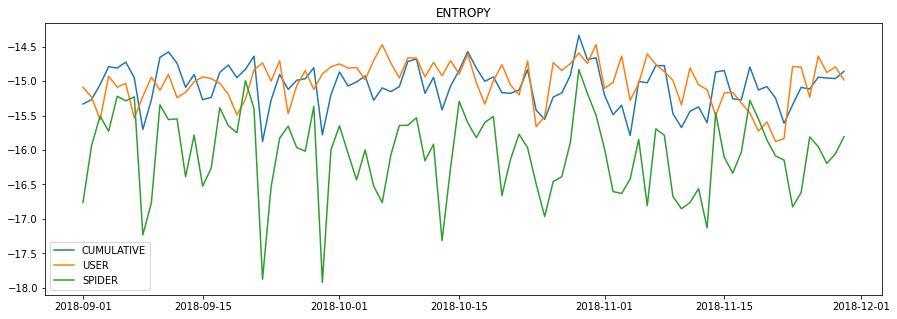

In [274]:
dates_2018 = pd.date_range(start=dt.datetime(2018,9,1), end=dt.datetime(2018,11,29), freq="D")
plt.figure(figsize=(15,5))
plt.title("ENTROPY")
plt.plot(dates_2018, ENTROPY[0,::], label = "CUMULATIVE")
plt.plot(dates_2018, ENTROPY[1,::], label = "USER")
plt.plot(dates_2018, ENTROPY[2,::], label = "SPIDER")
plt.legend()
plt.show()

In [275]:
days = np.array(range(1,31))
months = np.array(df1.month.unique())
years = np.array(df1.year.unique())

months_2018 = np.array([8,9])
traffics = np.array([None, "user", "spider"])

ENTROPY = np.zeros((len(traffics), len(months_2018)*len(days)))

for k, traffic in enumerate(traffics):
    l=0
    for i, month in enumerate(months_2018):
        for j, day in enumerate(days):

                
            clear_output(wait=True)
            print("TRAFFIC: ", traffic)
            print("MONTH/DAY: ", month ,"/", day)

            x = df1.access_frequency[m1(df1, year=years[1], month=month, day=day, domain=None, traffic=traffic)].to_numpy()
            x = x.reshape(-1,1)
            y = y.reshape(-1,1)

            ENTROPY[k,l] = entropy(x,k=3)
            l+=1


TRAFFIC:  spider
MONTH/DAY:  9 / 30


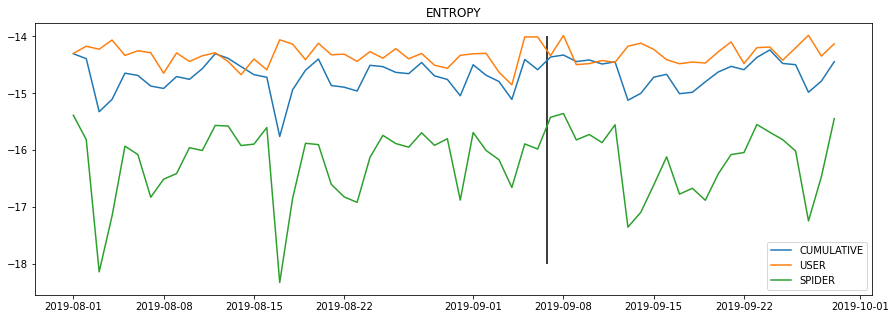

In [276]:
dates_2018 = pd.date_range(start=dt.datetime(2019,8,1), end=dt.datetime(2019,9,29), freq="D")
plt.figure(figsize=(15,5))
plt.title("ENTROPY")
plt.plot(dates_2018, ENTROPY[0,::], label = "CUMULATIVE")
plt.plot(dates_2018, ENTROPY[1,::], label = "USER")
plt.plot(dates_2018, ENTROPY[2,::], label = "SPIDER")
plt.vlines(dt.datetime(2019,9,6,17,40,0), ymin=-18, ymax=-14, color="black")
plt.legend()
plt.show()